# Market Breath Backtest

In [1]:
import logging
import yfinance as yf
import pandas as pd
from IPython.display import display, HTML
from tabulate import tabulate

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.propagate = True



pd.set_option('display.max_rows', 100)  # Adjust the number as needed
# Display the DataFrame in a scrollable window
def display_scrollable_dataframe(df, max_height=300):
    display(HTML(f'<div style="max-height: {max_height}px; overflow-y: auto;">{df.to_html()}</div>'))

def tabulate_printer(dic):
    return "\n{}".format(tabulate(
        [[k,v] for k, v in dic.items()], 
        headers=['Key', 'Value'], tablefmt='grid'))


In [2]:


import pandas as pd
import numpy as np
import os
from tabulate import tabulate

def tabulate_printer(dic):
    return "\n{}".format(tabulate(
        [[k,v] for k, v in dic.items()], 
        headers=['Key', 'Value'], tablefmt='grid'))

def loader(ticker='^GSPC', start='1970-01-01', end='2024-05-15'):
    file_path = '/Users/bichengwang/Documents/codes/python-notebook/data/finance/{} {} {}.csv'.format(
        ticker.upper(),
        start,
        end,
    )
    if os.path.exists(file_path):
        print("File exists!")
        df = pd.read_csv(file_path, parse_dates=['Date'])
        df['Close'] = df['Adj Close']
        return df
    # Download historical data for S&P 500
    df = yf.download(ticker, start=start, end=end)
    # Save the data to a CSV file
    df.to_csv(file_path)
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Close'] = df['Adj Close']
    return df

In [3]:
spx = loader()
# Now df contains your data with the 'date' column parsed as datetime objects
spx.head()

File exists!


Date  Open       High        Low      Close  Adj Close    Volume
0 1970-01-02   0.0  93.540001  91.790001  93.000000  93.000000   8050000
1 1970-01-05   0.0  94.250000  92.529999  93.459999  93.459999  11490000
2 1970-01-06   0.0  93.809998  92.129997  92.820000  92.820000  11460000
3 1970-01-07   0.0  93.379997  91.930000  92.629997  92.629997  10010000
4 1970-01-08   0.0  93.470001  91.989998  92.680000  92.680000  10670000

/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/1604547873.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/1604547873.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/1604547873.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


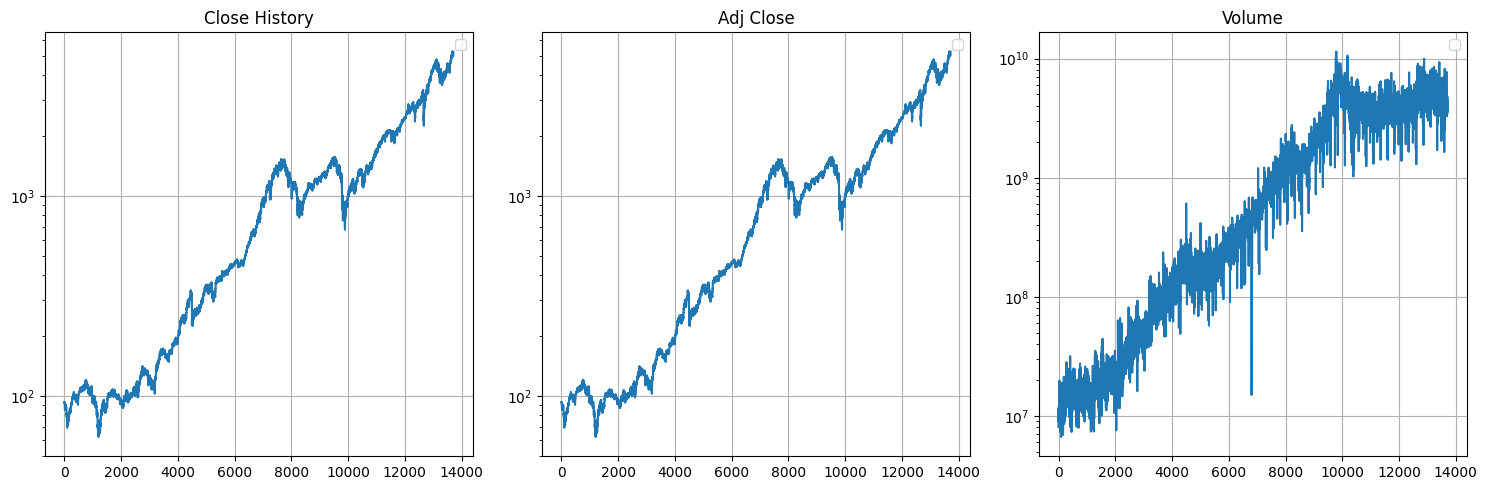

In [4]:
import matplotlib.pyplot as plt

def plot(ticker_df):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(ticker_df['Close'])
    axs[0].set_yscale('log')
    axs[0].set_title("Close History")
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(ticker_df['Adj Close'].values)
    axs[1].set_yscale('log')
    axs[1].set_title("Adj Close")
    axs[1].legend()
    axs[1].grid(True)
    axs[2].plot(ticker_df['Volume'])
    axs[2].set_yscale('log')
    axs[2].set_title("Volume")
    axs[2].legend()
    axs[2].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Show the plot
    plt.show()

plot(spx)

In [5]:
import sys
from importlib import reload

sys.path.append('/Users/bichengwang/Documents/codes/python-notebook/src')
reload(sys)

from finance.strategies.lib.indicators.td9 import calculate_td_sequential
df = loader()
df = calculate_td_sequential(df, td_val=9)

File exists!


In [6]:
import numpy as np

def exponential_mapping(input_values, min_val, max_val):
    # Generate an array of input values
    input_values = np.array(input_values)
    
    # Calculate the exponential mapping
    mapped_values = min_val + (max_val - min_val) * (np.exp(input_values) - np.exp(input_values.min())) / (np.exp(input_values.max()) - np.exp(input_values.min()))
    
    return mapped_values

# Example input values and output range
input_values = np.arange(8)  # 1, 2, 3, ..., 10
min_val = 1.
max_val = 5.

# Apply exponential mapping
output_values = exponential_mapping(input_values, min_val, max_val)

print("Input values:", input_values)
print("Output values:", output_values)

Input values: [0 1 2 3 4 5 6 7]
Output values: [1.         1.0062732  1.02332553 1.06967857 1.19567918 1.53818437
 2.46920998 5.        ]


In [36]:
from finance.strategies.lib.cash_flow_tools import generate_cash_flow
from datetime import datetime


def portfolio_history_plot(portfolio_history):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs[0][0].plot(portfolio_history['date'], portfolio_history['asset'])
    axs[0][0].set_yscale('log')
    axs[0][0].xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=365*5))
    axs[0][0].tick_params(axis='x', rotation=45)
    axs[0][0].set_title("Asset History")
    axs[0][0].legend()
    axs[0][0].grid(True)

    axs[0][1].plot(portfolio_history['date'], portfolio_history['share'])
    axs[0][1].set_yscale('log')
    axs[0][1].xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=365*5))
    axs[0][1].tick_params(axis='x', rotation=45)
    axs[0][1].set_title("Share History")
    axs[0][1].legend()
    axs[0][1].grid(True)

    axs[0][2].plot(portfolio_history['date'], portfolio_history['margin'])
    axs[0][2].xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=365*5))
    axs[0][2].tick_params(axis='x', rotation=45)
    axs[0][2].set_title("Margin History")
    axs[0][2].legend()
    axs[0][2].grid(True)

    axs[1][0].plot(portfolio_history['date'], portfolio_history['withdraw'])
    axs[1][0].xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=365*5))
    axs[1][0].tick_params(axis='x', rotation=45)
    axs[1][0].set_title("Withdraw")
    axs[1][0].legend()
    axs[1][0].grid(True)


    axs[1][1].plot(portfolio_history['date'], portfolio_history['min'])
    axs[1][1].plot(portfolio_history['date'], portfolio_history['max'])
    axs[1][1].xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=365*5))
    axs[1][1].tick_params(axis='x', rotation=45)
    axs[1][1].set_yscale('log')
    axs[1][1].set_title("Min Max")
    axs[1][1].legend()
    axs[1][1].grid(True)

    plt.tight_layout()
    plt.show()

def update_portfolio(portfolio, leverage, price):
    loan, cash, share, margin = portfolio['loan'], portfolio['cash'], portfolio['share'], portfolio['margin']
    asset = cash + share * price - loan
    loan = asset * (leverage - 1.)
    share = asset * leverage / price
    cash = 0.
    margin = loan / asset

    portfolio['loan'] = loan
    portfolio['cash'] = cash
    portfolio['share'] = share
    portfolio['margin'] = margin
    portfolio['asset'] = asset
    if asset < portfolio['max']:
        portfolio['min'] = asset
    elif asset >= portfolio['max']:
        portfolio['max'] = asset
        portfolio['min'] = asset
    portfolio['withdraw'] = min(0., -1.+portfolio['min']/portfolio['max'])
    return portfolio


def passive_update_portfolio(portfolio, leverage, price):
    loan, cash, share, margin = portfolio['loan'], portfolio['cash'], portfolio['share'], portfolio['margin']
    asset = cash + share * price - loan
    if leverage - 1. <= loan / asset:
        if loan < cash:
            loan = 0.
            share += (cash - loan) / price
            cash = 0.
        else:
            loan -= cash
            share += 0.
            cash = 0.
    else:
        loan = asset * (leverage - 1.)
        share = asset * leverage / price
        cash = 0.
    margin = loan / asset
    
    portfolio['asset'] = asset
    portfolio['loan'] = loan
    portfolio['share'] = share
    portfolio['cash'] = cash
    portfolio['margin'] = margin

    if asset < portfolio['max']:
        portfolio['min'] = asset
    elif asset >= portfolio['max']:
        portfolio['max'] = asset
        portfolio['min'] = asset
    portfolio['withdraw'] = min(0., -1.+portfolio['min']/portfolio['max'])
    return portfolio


def leverage(curr, min_leverage, max_leverage):
    comb = 2**(len(curr))
    leverage = np.arange(8) * ((max_leverage - min_leverage)/(comb-1.)) + min_leverage
    return {
        "uuu":leverage[7],
        "duu":leverage[6],
        "ddu":leverage[5],
        "udu":leverage[4],
        "dud":leverage[3],
        "uud":leverage[2],
        "udd":leverage[1],
        "ddd":leverage[0],
    }[curr]


def td9_leverage(df, cash_flow, max_leverage=3., min_leverage=1., annual_interest_rate=0.05):
    df = calculate_td_sequential(df, td_val=9)
    cash = iter(cash_flow)
    initial = next(cash)
    portfolio_history = pd.DataFrame(columns=['date', 'cash', 'loan', 'share', 'margin','td9', 'asset', 'min', 'max', 'withdraw'])
    td_history = "udd"
    portfolio = {
        "date": None,
        "asset": initial,
        "cash": initial,
        "loan": 0.,
        "share": 0.,
        "margin": 0.,
        "td9": td_history,
        "min": initial,
        "max": initial,
        "withdraw": 0.0,
    }
    for _, row in df.iterrows():
        if row['trend_up']:
            td_history = td_history[1:] + "u"
        if row['trend_down']:
            td_history = td_history[1:] + "d"
        portfolio['date'] = row['Date']
        portfolio['td9'] = td_history
        leverage_ratio = leverage(td_history, min_leverage, max_leverage)
        portfolio = update_portfolio(portfolio, leverage_ratio, row['Close'])
        if row['Date'].weekday() == 0:
            portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)
            portfolio['cash'] += next(cash)
            portfolio['loan'] *= (1 + annual_interest_rate) ** (1. / 52.)
        
    return portfolio_history


def td9_never_loss_leverage(df, cash_flow, max_leverage=3., min_leverage=1., annual_interest_rate=0.05):
    cash = iter(cash_flow)
    initial = next(cash)
    portfolio_history = pd.DataFrame(columns=['date', 'cash', 'loan', 'share', 'margin','td9', 'asset', 'min', 'max', 'withdraw'])
    td_history = "udd"
    portfolio = {
        "date": "",
        "asset": initial,
        "cash": initial,
        "loan": 0.,
        "share": 0.,
        "margin": 0.,
        "td9": td_history,
        "min": initial,
        "max": initial,
        "withdraw": 0.0,
    }
    for _, row in df.iterrows():
        if row['trend_up']:
            td_history = td_history[1:] + "u"
        if row['trend_down']:
            td_history = td_history[1:] + "d"
        portfolio['date'] = row['Date']
        portfolio['td9'] = td_history
        # keep leverage if asset under previous max
        leverage_ratio = leverage(td_history, min_leverage, max_leverage)
        if portfolio['asset'] < portfolio['max']:
            leverage_ratio = max(leverage_ratio, portfolio['margin'] + 1.)
        portfolio = update_portfolio(portfolio, leverage_ratio, row['Close'])
        if row['Date'].weekday() == 0:
            portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)
            portfolio['cash'] += next(cash)
            portfolio['loan'] *= (1 + annual_interest_rate) ** (1. / 52.)

    return portfolio_history


def td9_passive_leverage(df, cash_flow, max_leverage=3., min_leverage=1., annual_interest_rate=0.05):
    cash = iter(cash_flow)
    initial = next(cash)
    portfolio_history = pd.DataFrame(columns=['date', 'cash', 'loan', 'share', 'margin','td9', 'asset', 'min', 'max', 'withdraw'])
    td_history = "udd"
    portfolio = {
        "date": "",
        "asset": initial,
        "cash": initial,
        "loan": 0.,
        "share": 0.,
        "margin": 0.,
        "td9": td_history,
        "min": initial,
        "max": initial,
        "withdraw": 0.0,
    }
    for _, row in df.iterrows():
        if row['trend_up']:
            td_history = td_history[1:] + "u"
        if row['trend_down']:
            td_history = td_history[1:] + "d"
        portfolio['date'] = row['Date']
        portfolio['td9'] = td_history

        # keep leverage if asset under previous max
        leverage_ratio = leverage(td_history, min_leverage, max_leverage)

        portfolio = passive_update_portfolio(portfolio, leverage_ratio, row['Close'])

        if row['Date'].weekday() == 0:
            portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)
            portfolio['cash'] += next(cash)
            portfolio['loan'] *= (1 + annual_interest_rate) ** (1. / 52.)

    return portfolio_history


def leverage_investment(
        df, 
        initial, 
        annual_investment, 
        weeks, 
        min_leverage = 1., 
        max_leverage = 4.,
        max_margin = 3., 
        annual_risk_free_rate=0.0, 
        risk_adj=0.0, 
        annual_inflation_rate = 0.0, 
        should_plot=False,
        strategy="td9_leverage"):
    df = df.tail((weeks - 1) * 5).reset_index(drop=True)
    df = calculate_td_sequential(df, td_val=9)
    cash_flow, pv, fv = generate_cash_flow(initial, annual_investment, years=weeks/52., annual_growth_rate=annual_inflation_rate, annual_risk_free_rate=annual_risk_free_rate, mode='weekly')

    portfolio_history = {
        "td9_leverage":td9_leverage, 
        "td9_never_loss_leverage":td9_never_loss_leverage,
        "td9_passive_leverage": td9_passive_leverage,
    }[strategy](df, cash_flow, min_leverage=min_leverage, max_leverage=max_leverage, annual_interest_rate=(annual_risk_free_rate+risk_adj))

    logger.info(portfolio_history.iloc[-1])
    logger.info("\nasset vs. pv: {}".format(portfolio_history.iloc[-1]['asset'] / pv))
    logger.info("\nasset vs. fv: {}".format(portfolio_history.iloc[-1]['asset'] / fv))
    if should_plot:
        portfolio_history_plot(portfolio_history)
    return


In [37]:
years = 10
df = loader()
df = df[(df['Date'] <= '2024-05-15')&(df['Date'] >= '1970-01-01')]
initial = 1000.
annual_investment=120.
min_leverage=1.
max_leverage=2.
max_margin=10.
annual_risk_free_rate=0.0
risk_adj=0.0
annual_inflation_rate=0.0


File exists!


INFO:finance.strategies.lib.cash_flow_tools:{'pv': 2197.6923076923426, 'fv': 2197.6923076923426}
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:148: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)
INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                 890.460551
share                  1.364319
margin                 0.142857
td9                         udd
asset               6233.223855
min                 6233.223855
max                 6264.927141
withdraw               -0.00506
Name: 483, dtype: object
INFO:__main__:
asset vs. pv: 2.836258667108572
INFO:__main__:
asset vs. fv: 2.836

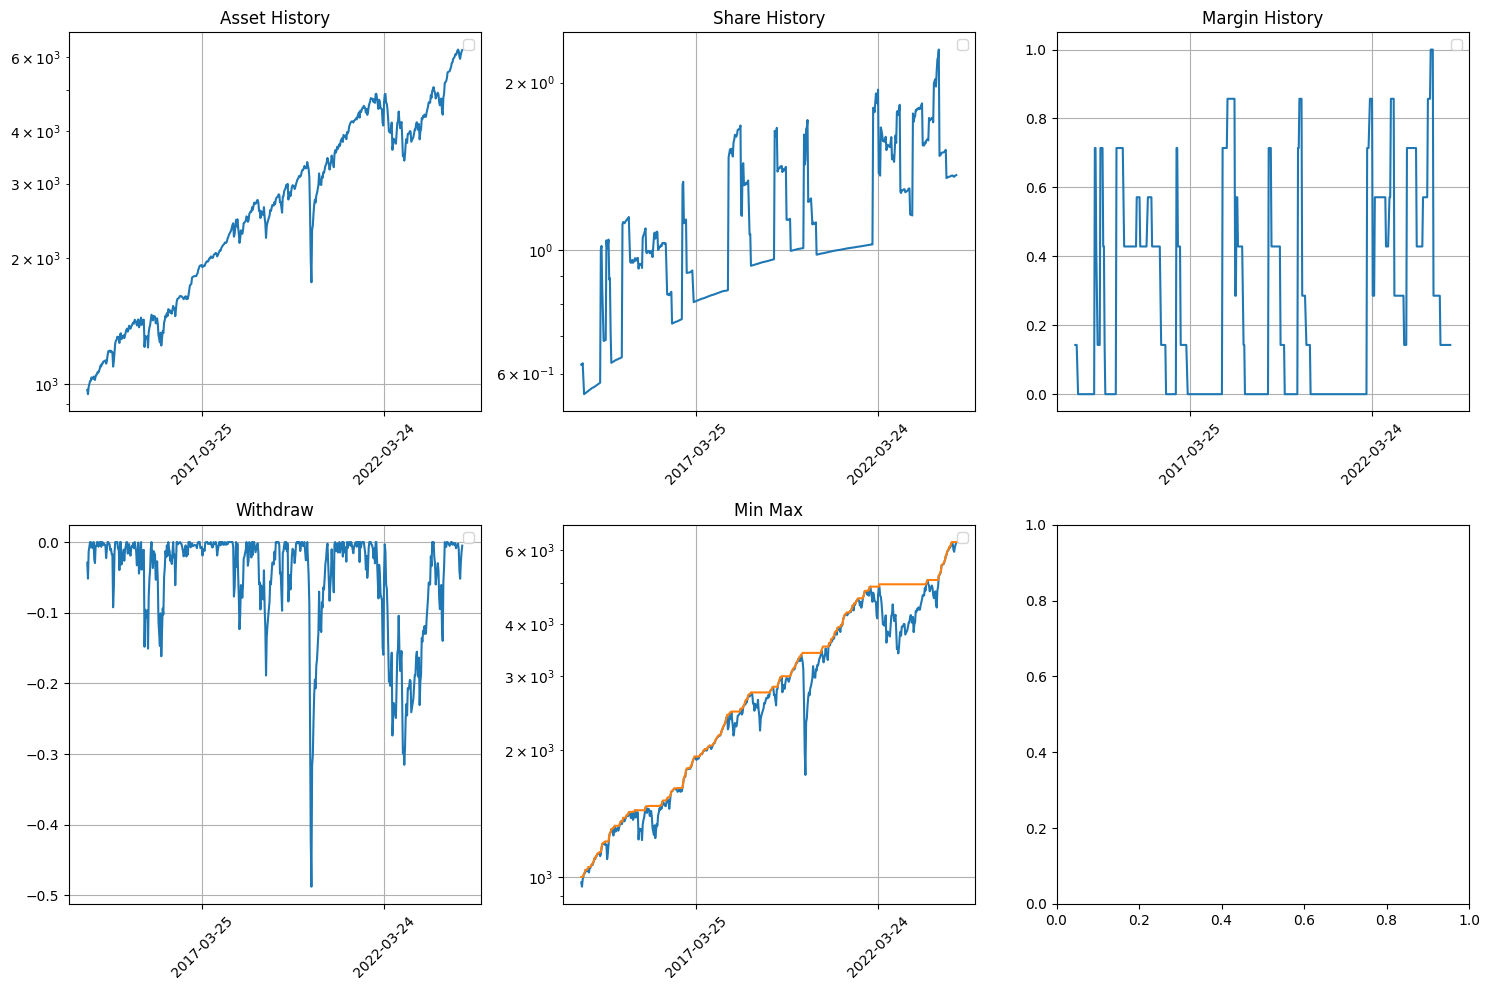

In [38]:
leverage_investment(
    df,
    initial=initial, 
    annual_investment=annual_investment, 
    weeks = 52 * years, 
    min_leverage=min_leverage,
    max_leverage=max_leverage,
    max_margin=max_margin, 
    annual_risk_free_rate=annual_risk_free_rate,
    risk_adj=risk_adj,
    annual_inflation_rate=annual_inflation_rate,
    strategy="td9_leverage",
    should_plot=True,
)

INFO:finance.strategies.lib.cash_flow_tools:{'pv': 2197.6923076923426, 'fv': 2197.6923076923426}


/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:185: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)
INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                  991.03592
share                  1.518416
margin                 0.142857
td9                         udd
asset                6937.25144
min                  6937.25144
max                 6974.144509
withdraw               -0.00529
Name: 483, dtype: object
INFO:__main__:
asset vs. pv: 3.1566072357054193
INFO:__main__:
asset vs. fv: 3.1566072357054193
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12:

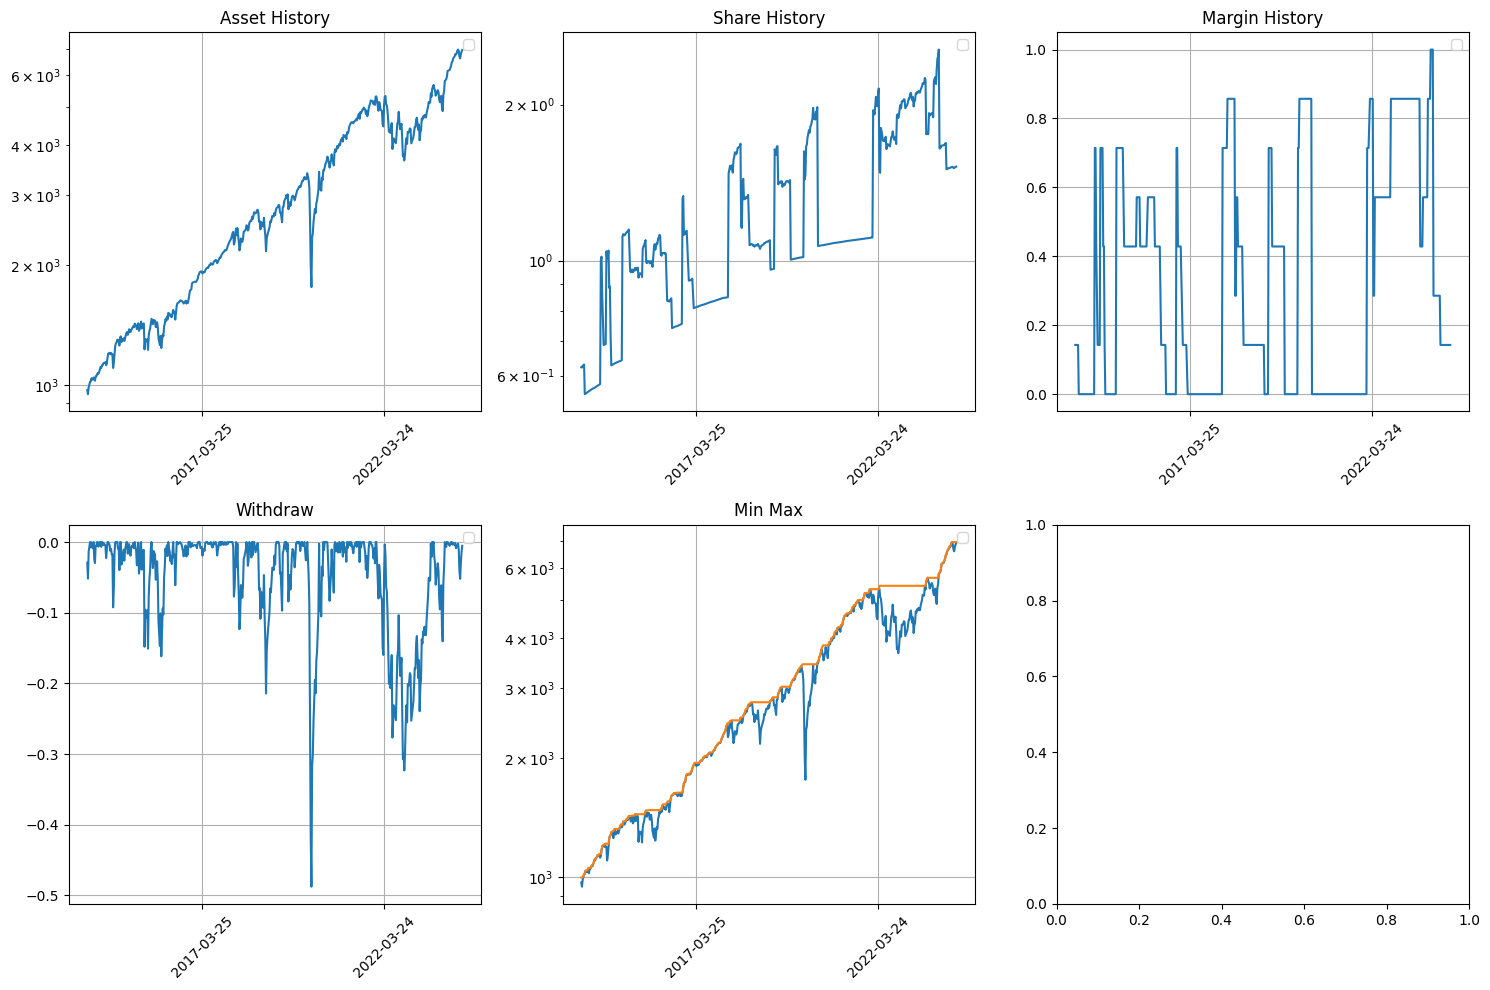

In [39]:
leverage_investment(
    df,
    initial = initial, 
    annual_investment=annual_investment, 
    weeks = 52 * years, 
    min_leverage=min_leverage,
    max_leverage=max_leverage,
    max_margin=max_margin, 
    annual_risk_free_rate=annual_risk_free_rate,
    risk_adj=risk_adj,
    annual_inflation_rate=annual_inflation_rate,
    strategy="td9_never_loss_leverage",
    should_plot=True,
)

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1560         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 1.5          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

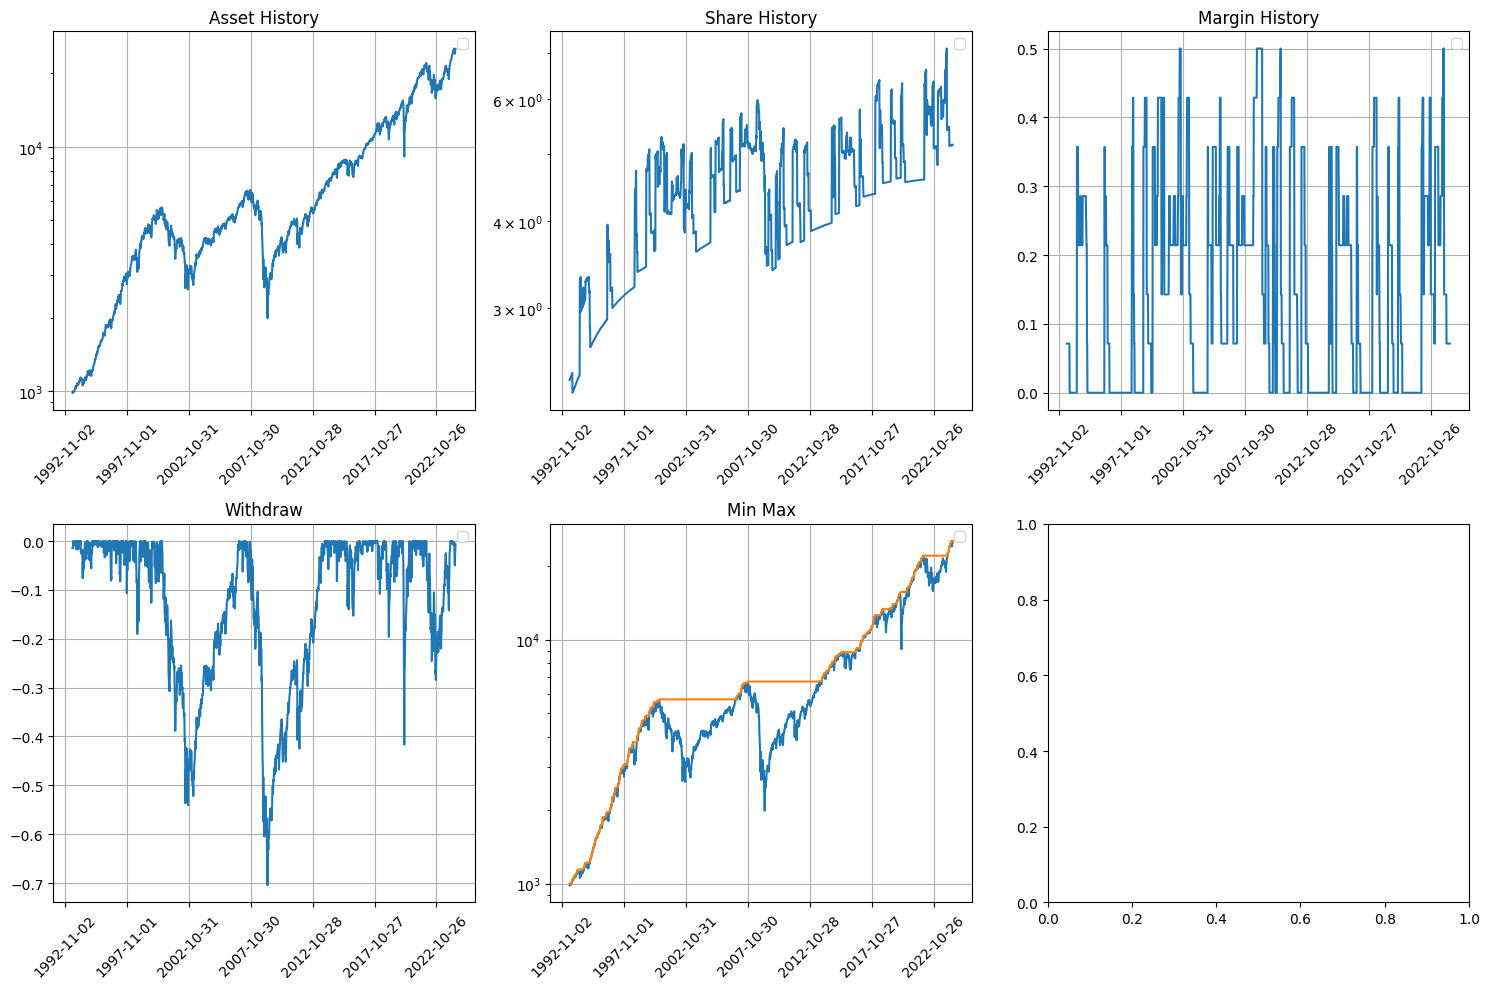

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1560                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 1.5                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

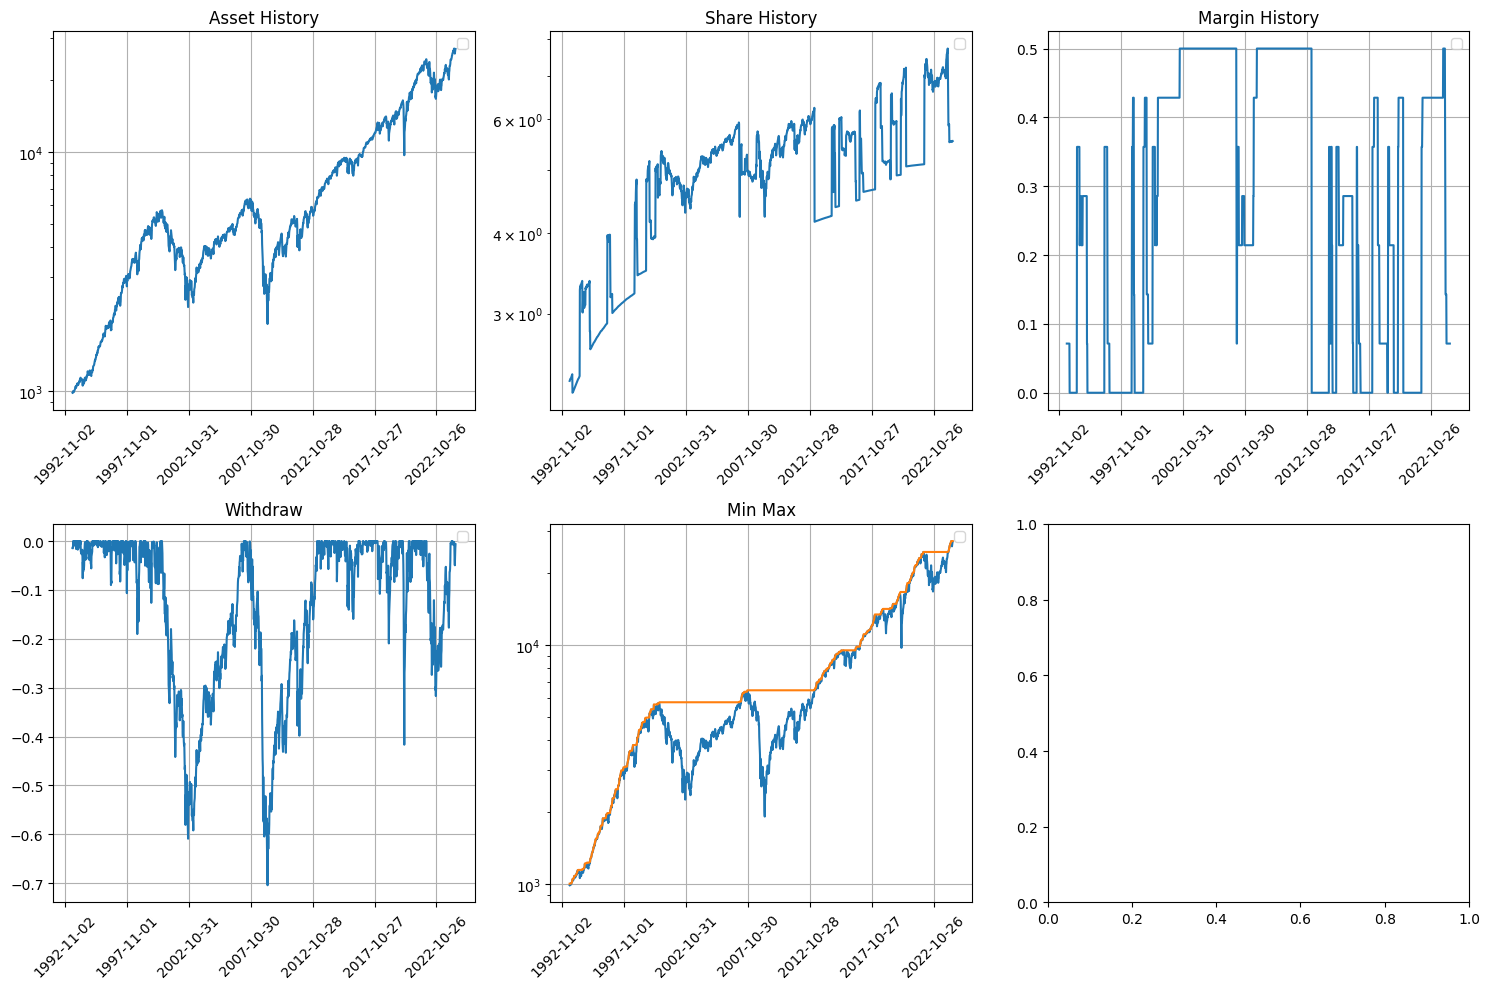

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1560                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 1.5                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

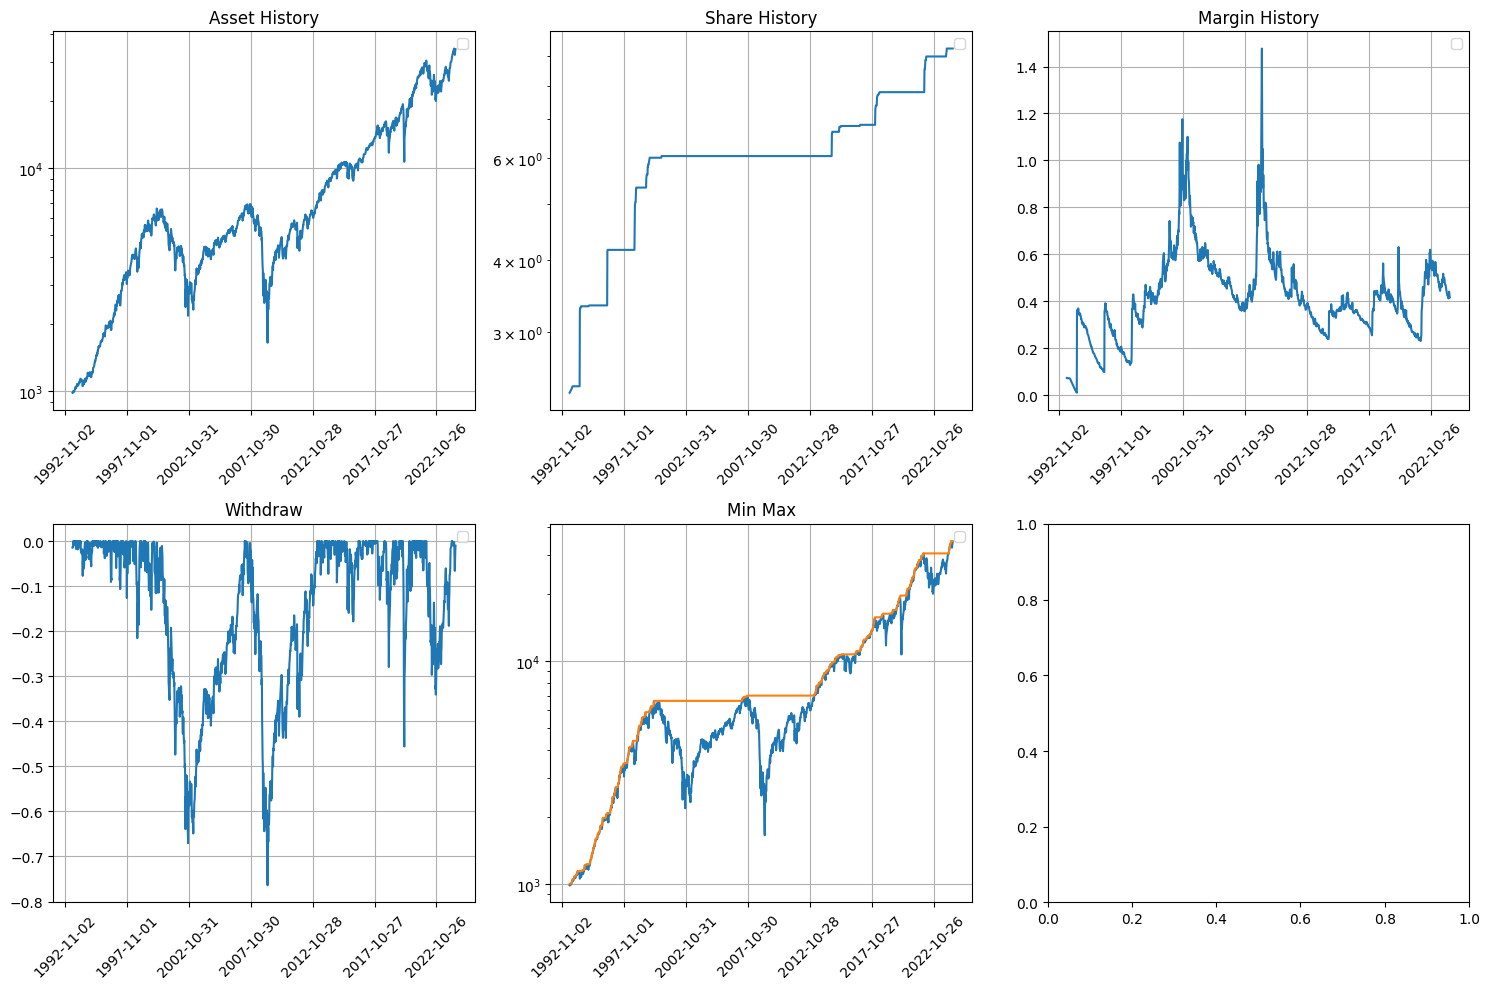

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1560         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 2.0          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

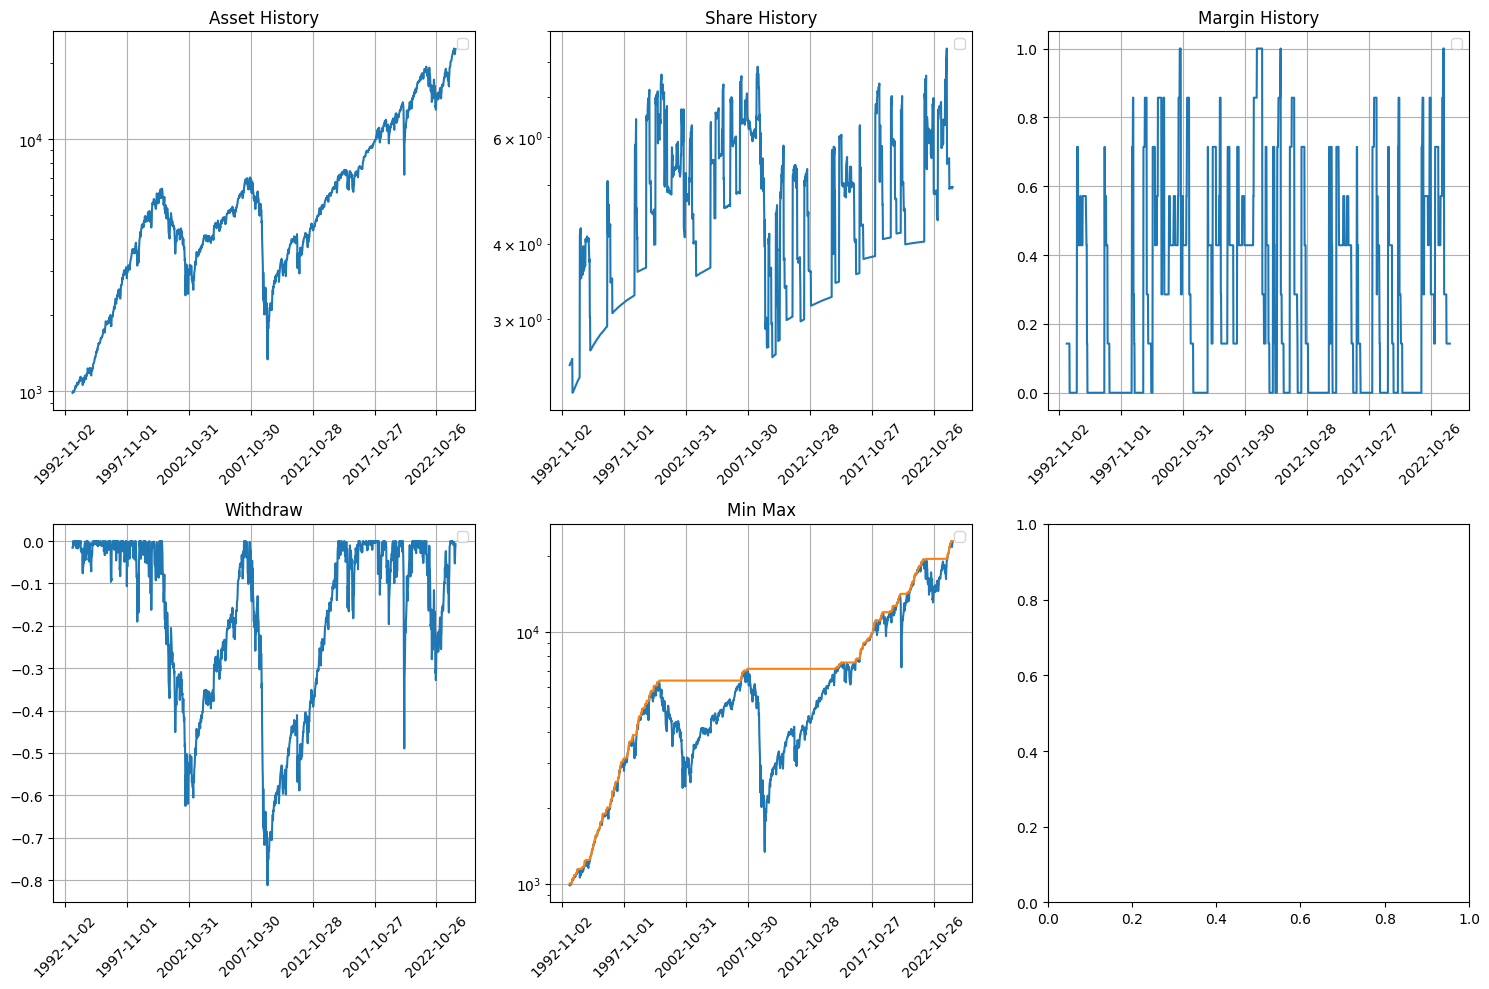

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1560                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 2.0                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

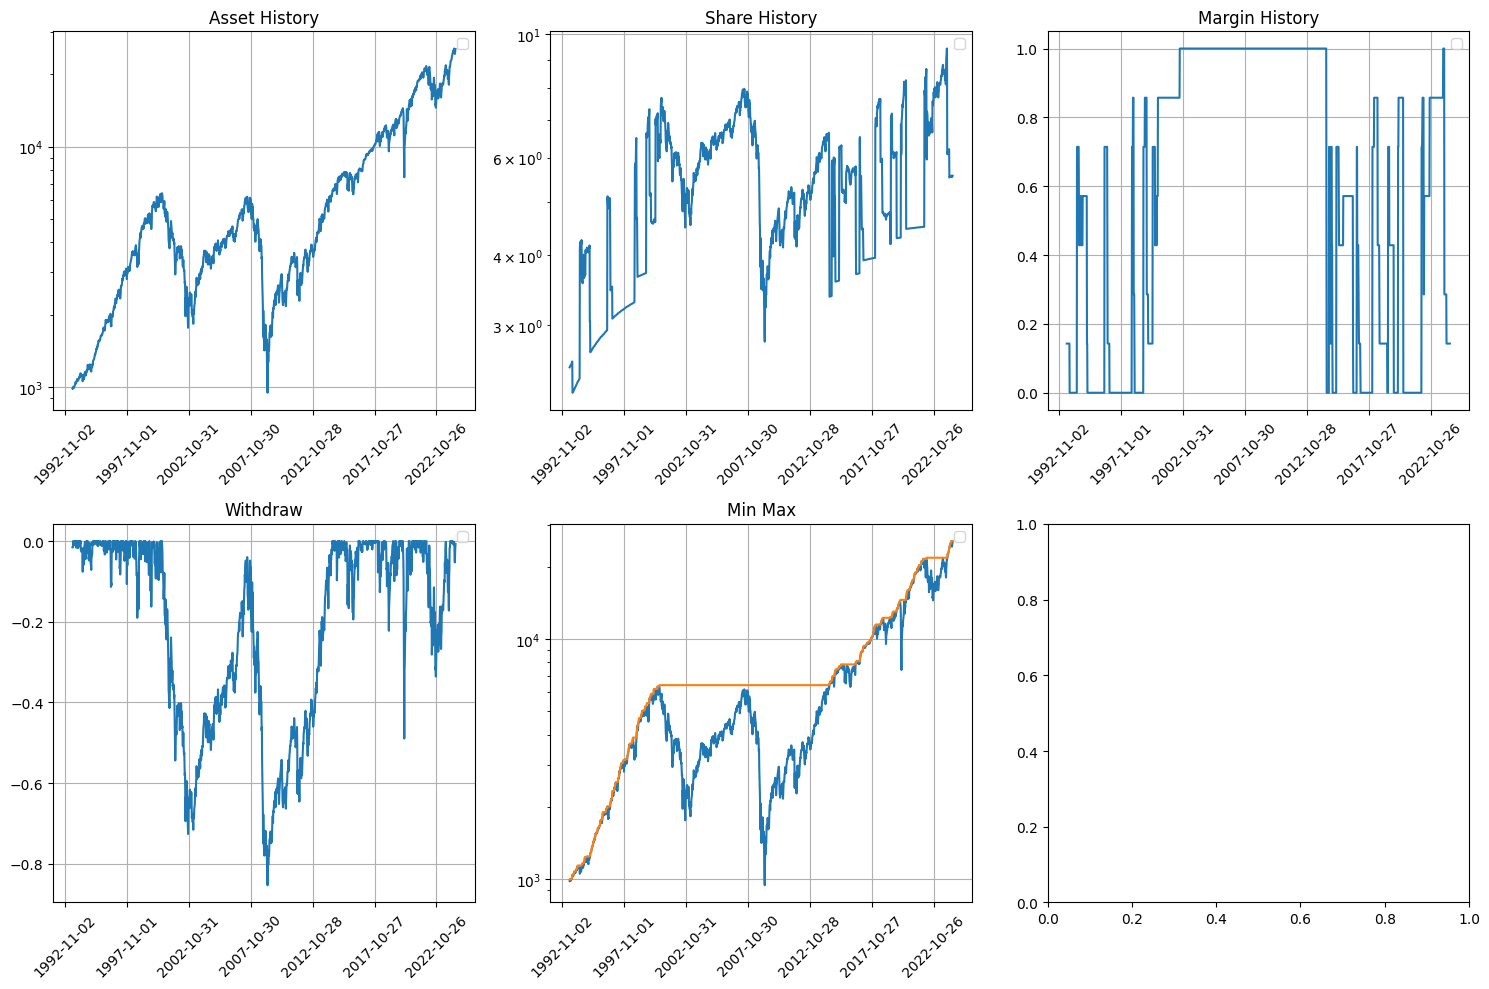

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1560                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 2.0                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

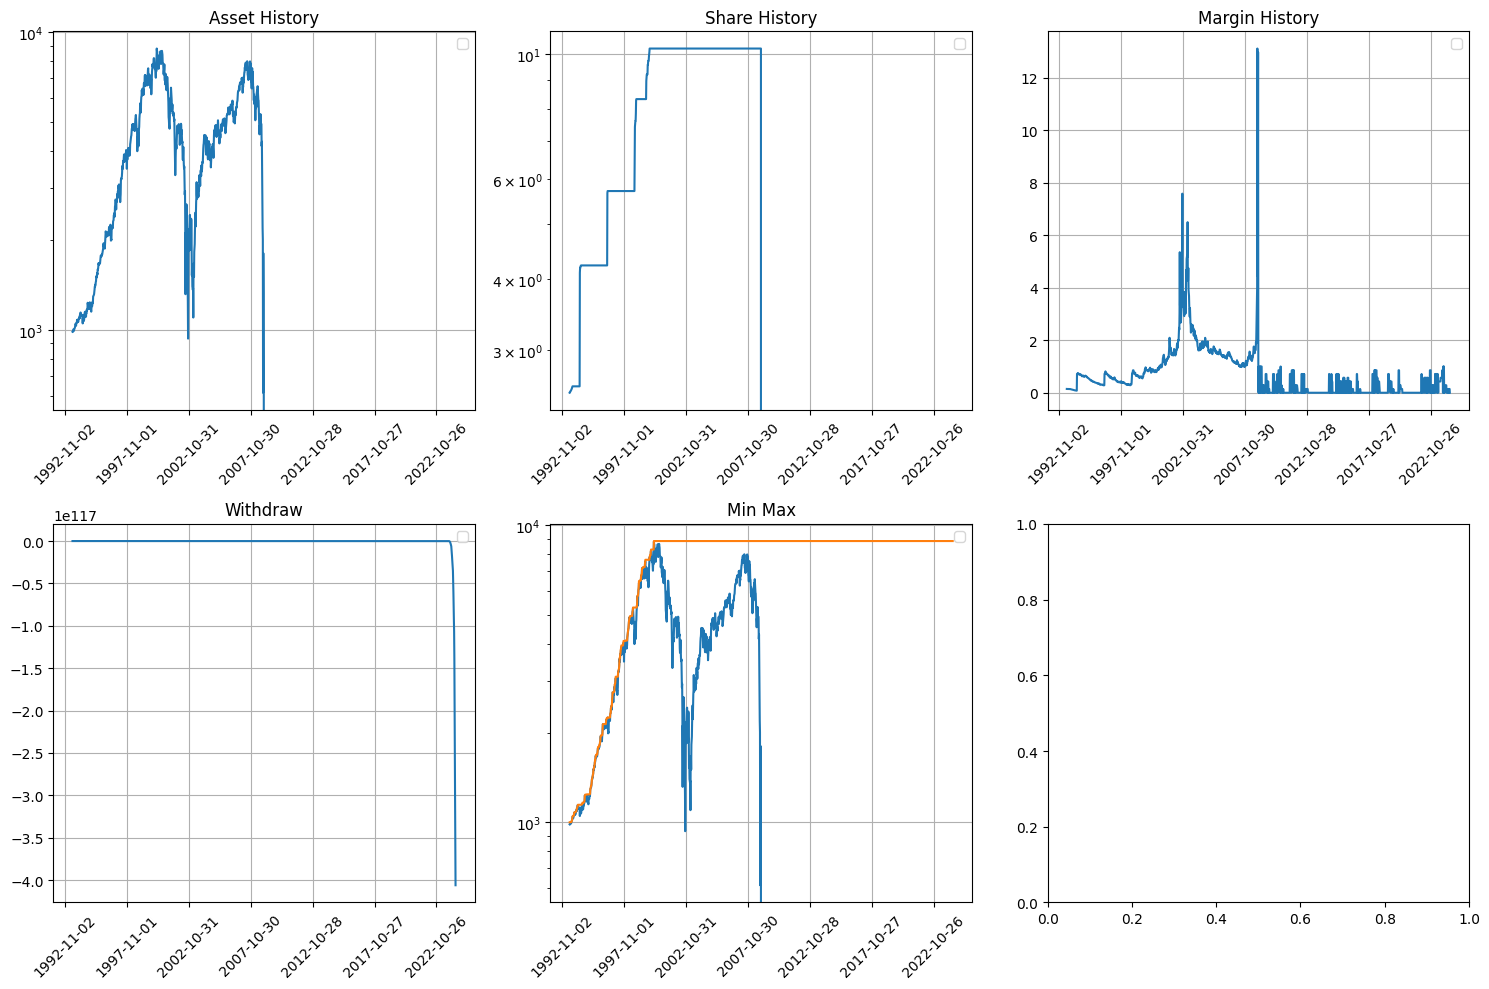

In [40]:
import itertools

# Define the grid search grid
grid = {
    'weeks': [30*52],
    'initial': [1000.],
    'annual_investment': [120.],
    'min_leverage': [1.],
    'max_leverage': [1.5, 2.],
    'max_margin': [10.],
    'annual_risk_free_rate': [ 0.04],
    'risk_adj': [0.0],
    'annual_inflation_rate': [0.0],
    'strategy': ["td9_leverage", "td9_never_loss_leverage", "td9_passive_leverage"],
    'should_plot': [True],
}

# Perform grid search
param_combinations = list(itertools.product(*grid.values()))

# Print the parameter combinations
for params in param_combinations:
    param_dict = dict(zip(grid.keys(), params))
    logger.info(tabulate_printer(param_dict))
    leverage_investment(df, **param_dict)

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1352         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 1.5          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

INFO:finance.strategies.lib.cash_flow_tools:{'pv': 2938.3959503223573, 'fv': 8303.649419617337}
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:148: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_history = portfolio_history._append(portfolio.copy(), ignore_index=True)


File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan               837449.41654
share               3520.290951
margin                 0.357143
td9                         ddu
asset            2344858.366311
min              2344858.366311
max              2455267.170247
withdraw              -0.044968
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: 798.0062612236092
INFO:__main__:
asset vs. fv: 282.3888928609655
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend(

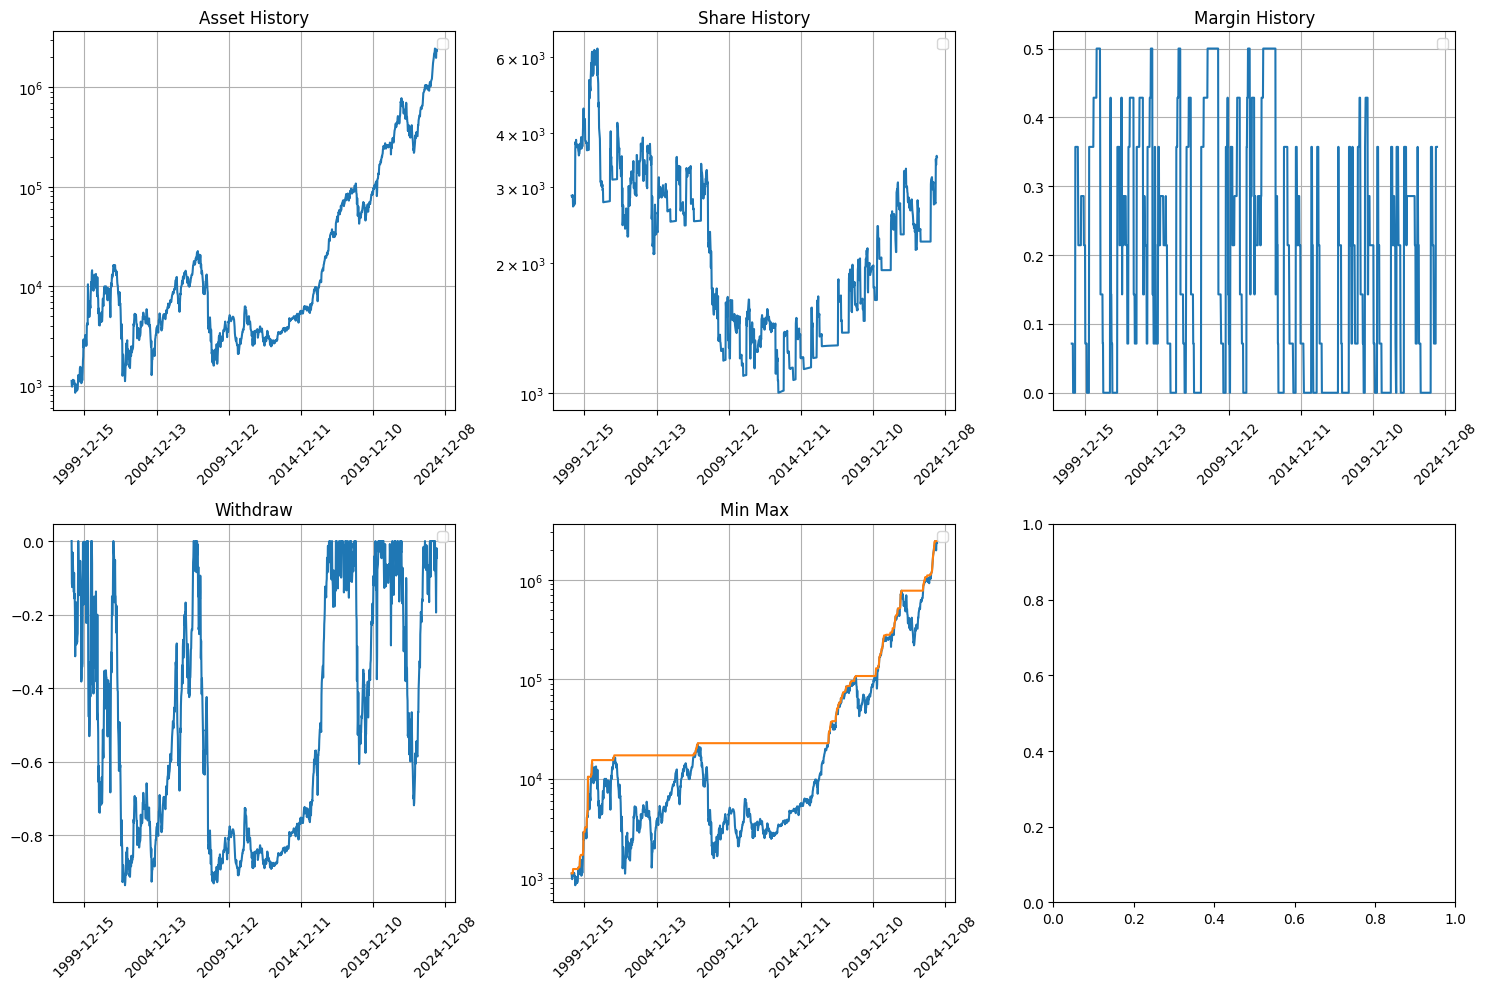

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1352                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 1.5                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan             1663383.366923
share               6992.175646
margin                 0.357143
td9                         ddu
asset            4657473.427384
min              4657473.427384
max              4876790.239217
withdraw              -0.044972
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: 1585.0394249534063
INFO:__main__:
asset vs. fv: 560.8947574762858
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend

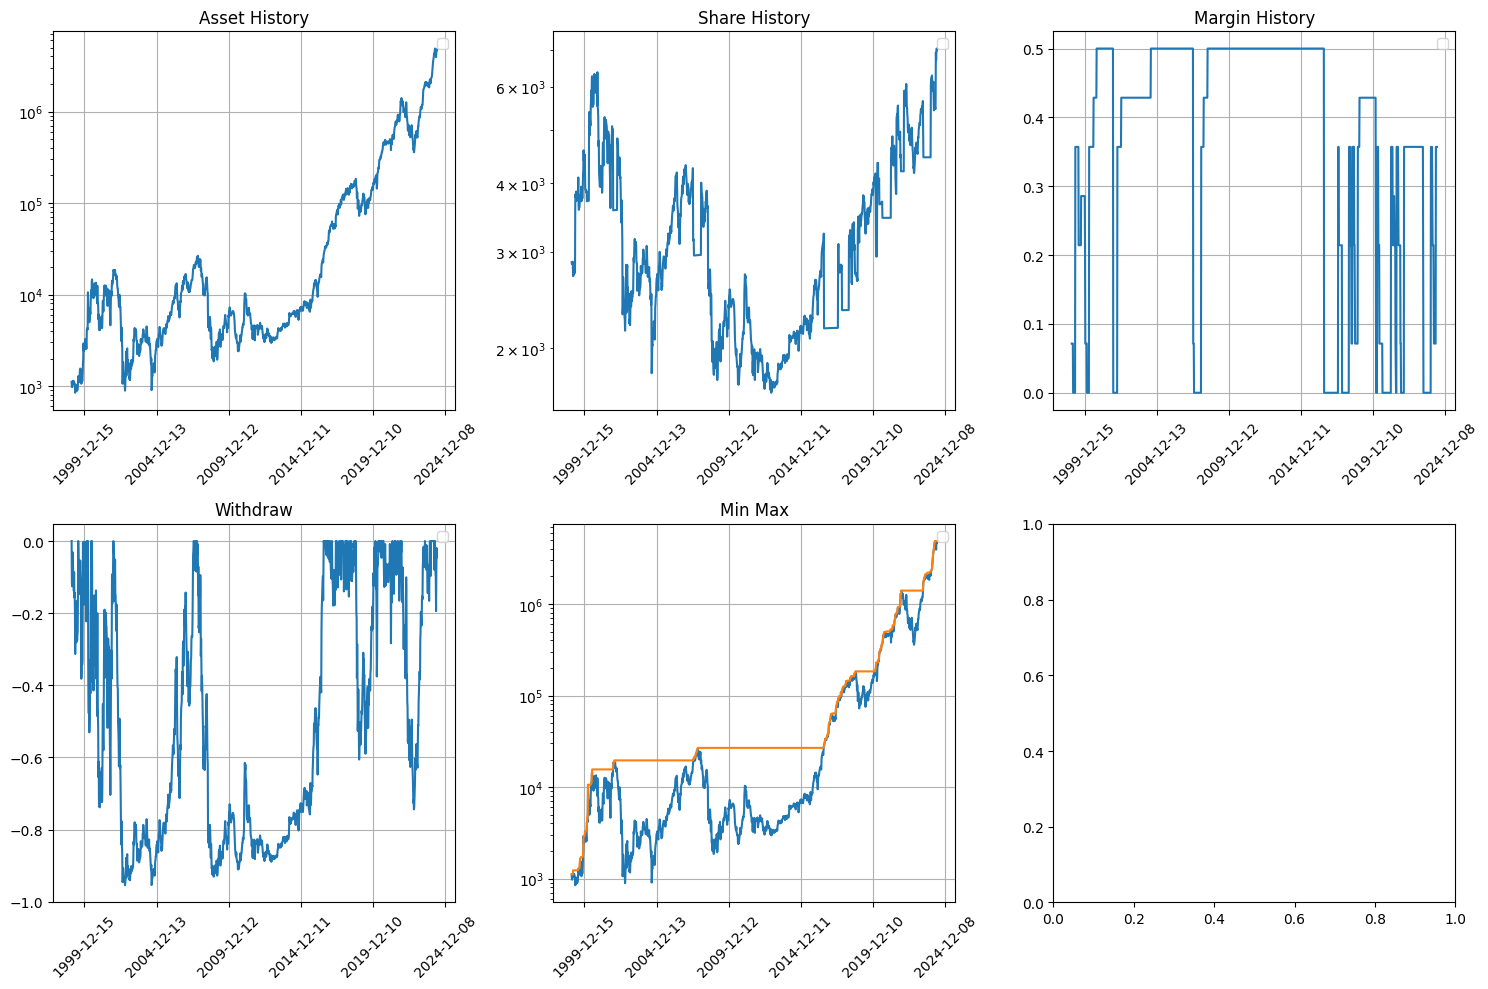

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1352                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 1.5                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

File exists!


INFO:__main__:date                                      2024-05-13 00:00:00
cash                                                      0.0
loan       -1417653117565966702684931918319146991900826333...
share      -5959227319933020686324468015332562771835770839...
margin                                               0.357143
td9                                                       ddu
asset      -3969428729184706057714367676365007525248282594...
min        -3969428729184706057714367676365007525248282594...
max                                              34697.911456
withdraw   -1143996443178286910304654175996237969079046906...
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: -1.3508828613615667e+143
INFO:__main__:
asset vs. fv: -4.780342387537397e+142
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is calle

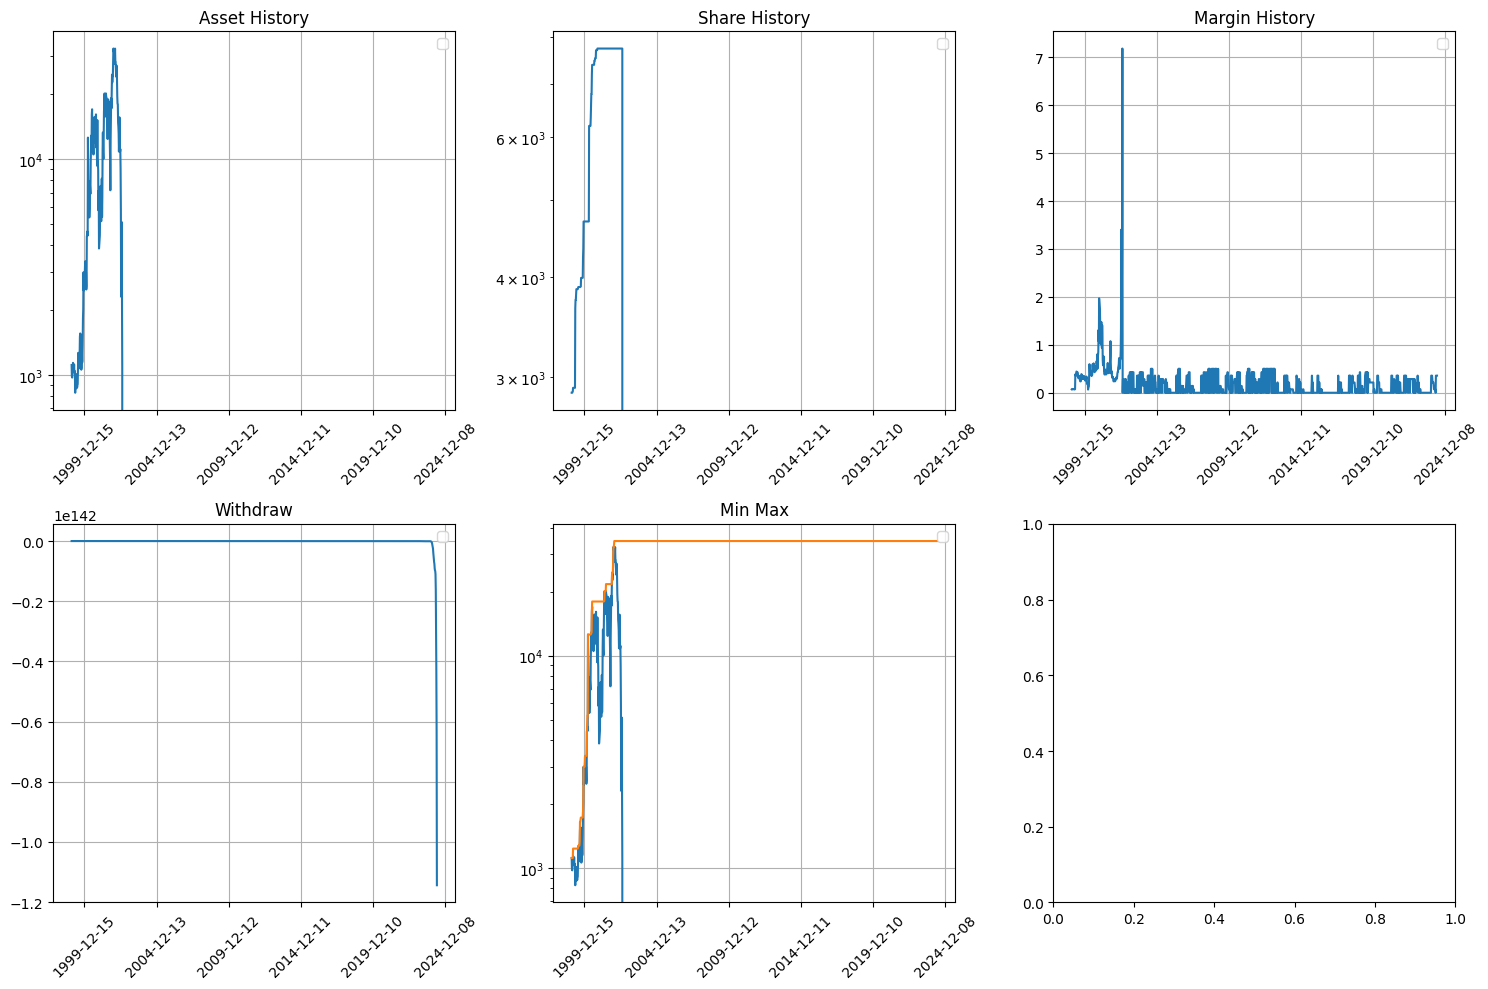

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1352         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 2.0          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan             1013773.025552
share               2691.462613
margin                 0.714286
td9                         ddu
asset            1419282.235773
min              1419282.235773
max              1487064.534305
withdraw              -0.045581
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: 483.01258910233395
INFO:__main__:
asset vs. fv: 170.92270687873292
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legen

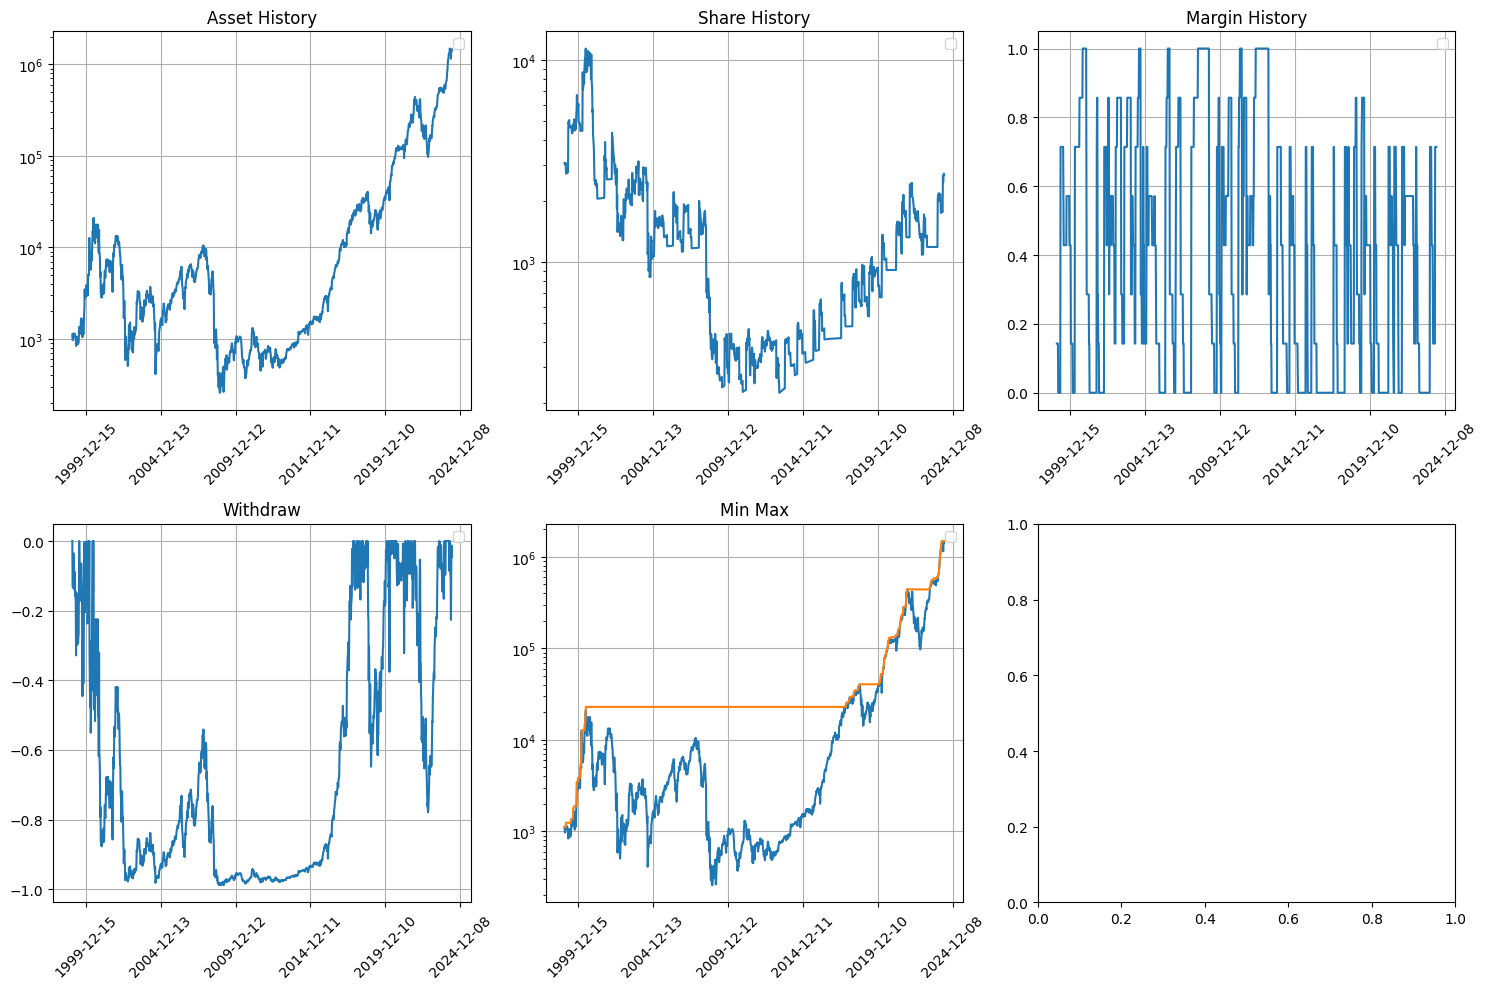

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1352                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 2.0                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan             3140157.782277
share               8336.794388
margin                 0.714286
td9                         ddu
asset            4396220.895188
min              4396220.895188
max              4606213.607417
withdraw              -0.045589
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: 1496.129510628353
INFO:__main__:
asset vs. fv: 529.432382441637
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend()

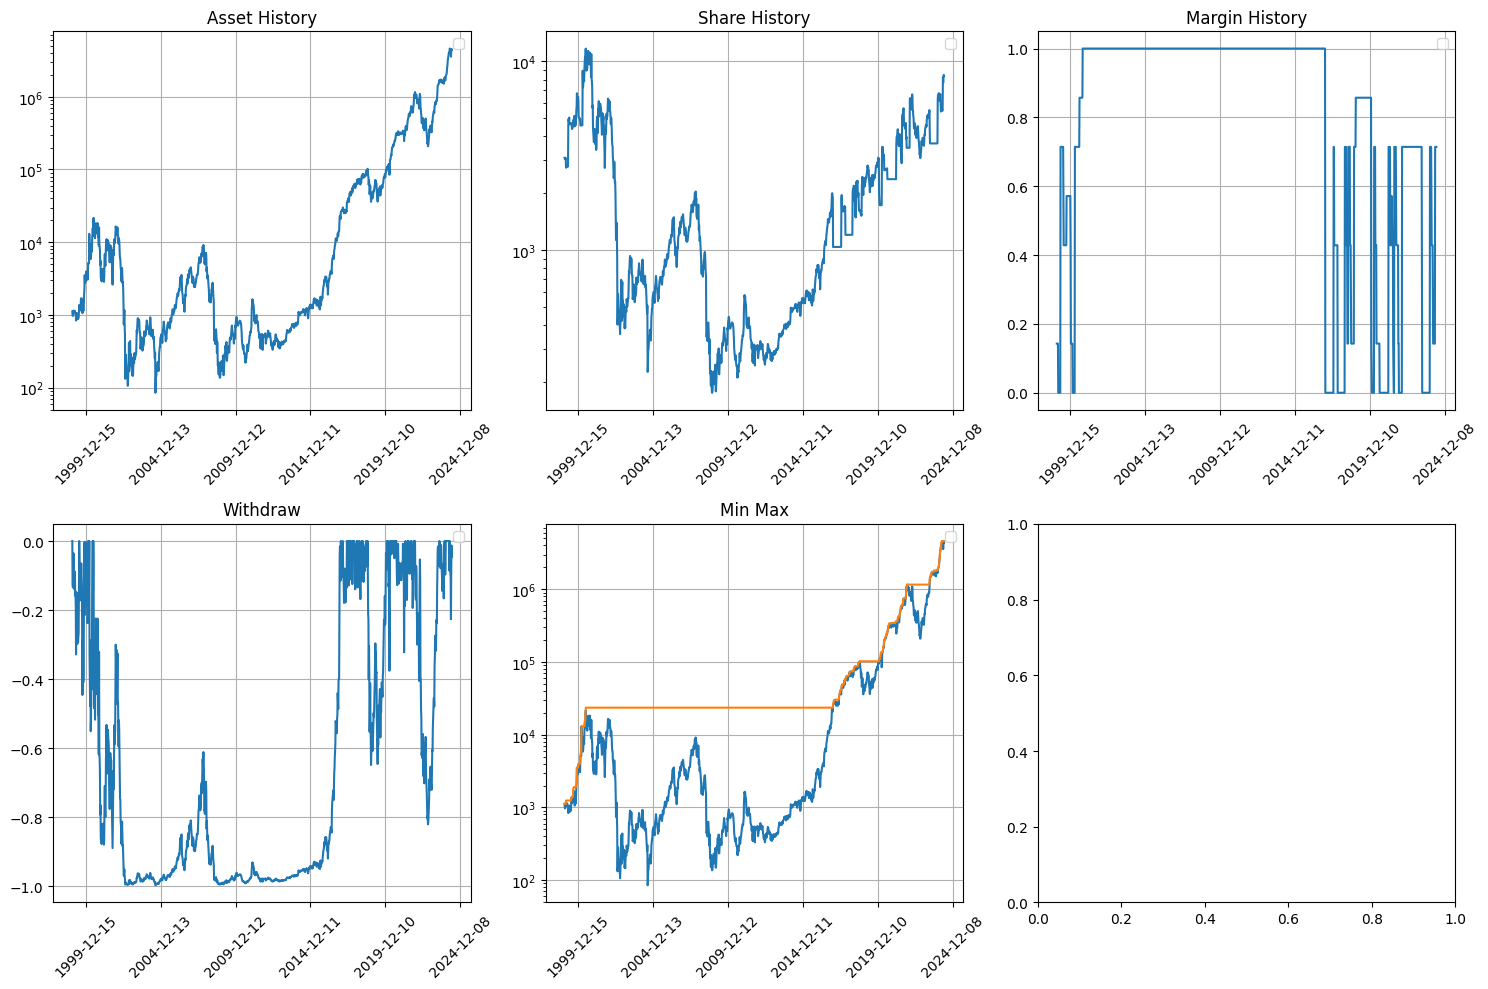

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1352                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 2.0                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

File exists!


INFO:__main__:date                                      2024-05-13 00:00:00
cash                                                      0.0
loan       -2726628484981919160753520613822721941743011428...
share      -7238916840506149984724712592439134275523229473...
margin                                               0.714286
td9                                                       ddu
asset      -3817279878974687411579681109719016184936910961...
min        -3817279878974687411579681109719016184936910961...
max                                               32510.53342
withdraw   -1174167101363654482839832663785172133066784211...
Name: 1192, dtype: object
INFO:__main__:
asset vs. pv: -1.2991033010904852e+266
INFO:__main__:
asset vs. fv: -4.597111084623081e+265
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is calle

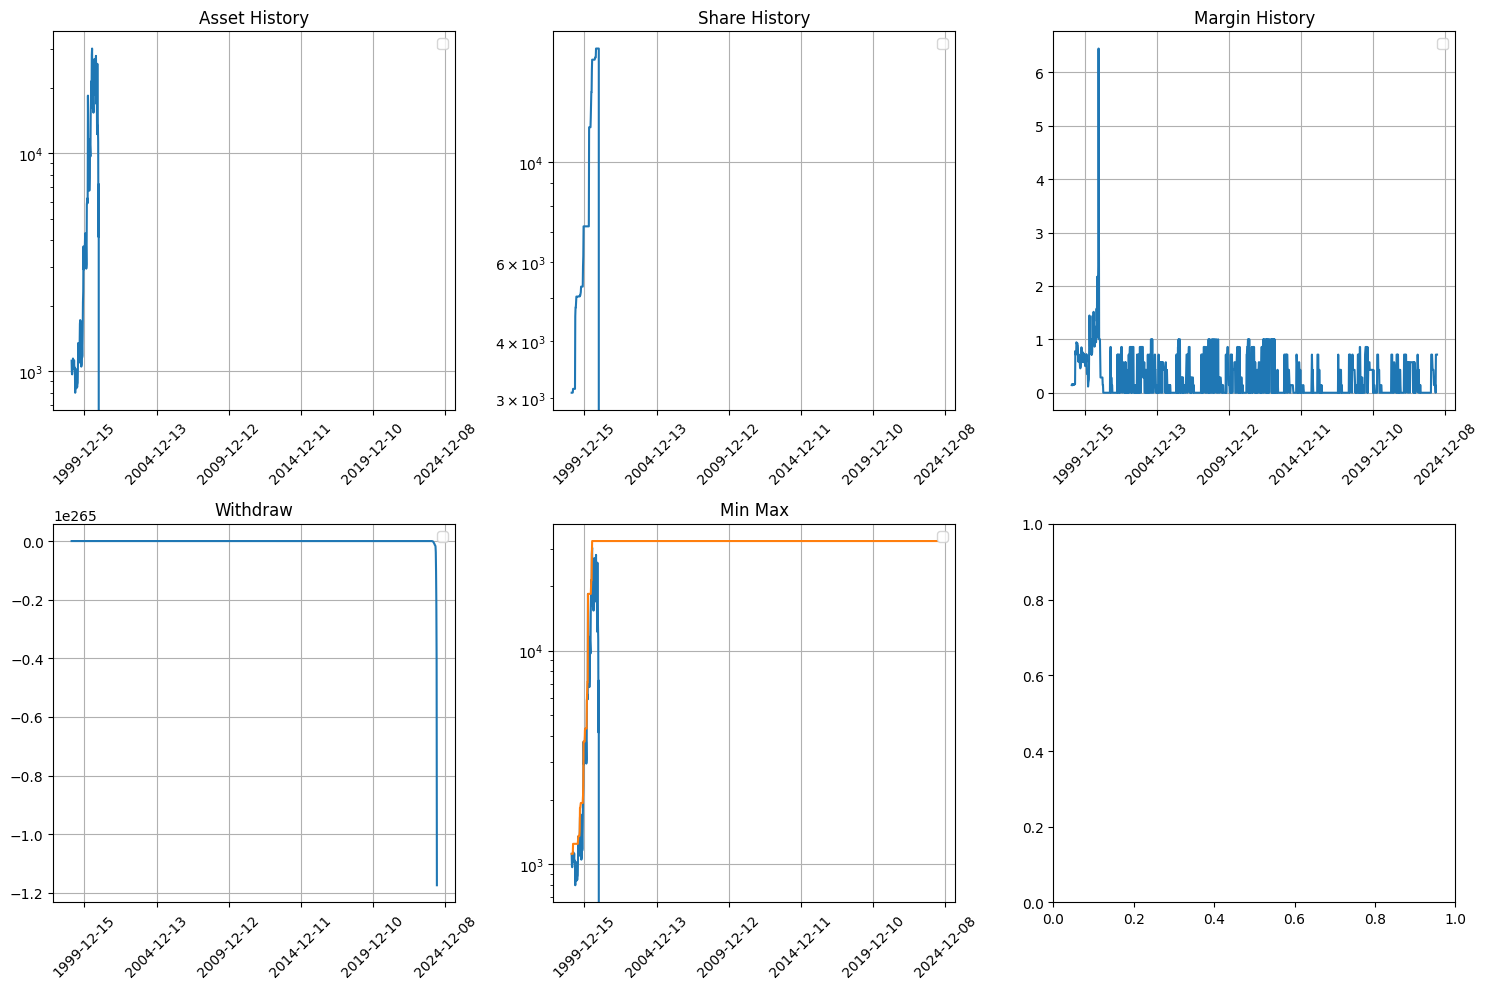

In [41]:
import itertools

# Define the grid search grid
grid = {
    'weeks': [26*52],
    'initial': [1000.],
    'annual_investment': [120.],
    'min_leverage': [1.],
    'max_leverage': [1.5, 2.],
    'max_margin': [10.],
    'annual_risk_free_rate': [ 0.04],
    'risk_adj': [0.0],
    'annual_inflation_rate': [0.0],
    'strategy': ["td9_leverage", "td9_never_loss_leverage", "td9_passive_leverage"],
    'should_plot': [True],
}

# Perform grid search
param_combinations = list(itertools.product(*grid.values()))

# Print the parameter combinations
for params in param_combinations:
    param_dict = dict(zip(grid.keys(), params))
    logger.info(tabulate_printer(param_dict))
    df = loader("NVDA", start="1999-01-22", end="2024-05-19")
    leverage_investment(df, **param_dict)

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1560         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 1.5          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                        0.0
share                  5.085821
margin                      0.0
td9                         ddd
asset              92554.863801
min                92554.863801
max                93254.534171
withdraw              -0.007503
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: 29.90169370189928
INFO:__main__:
asset vs. fv: 9.01730366879533
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend()

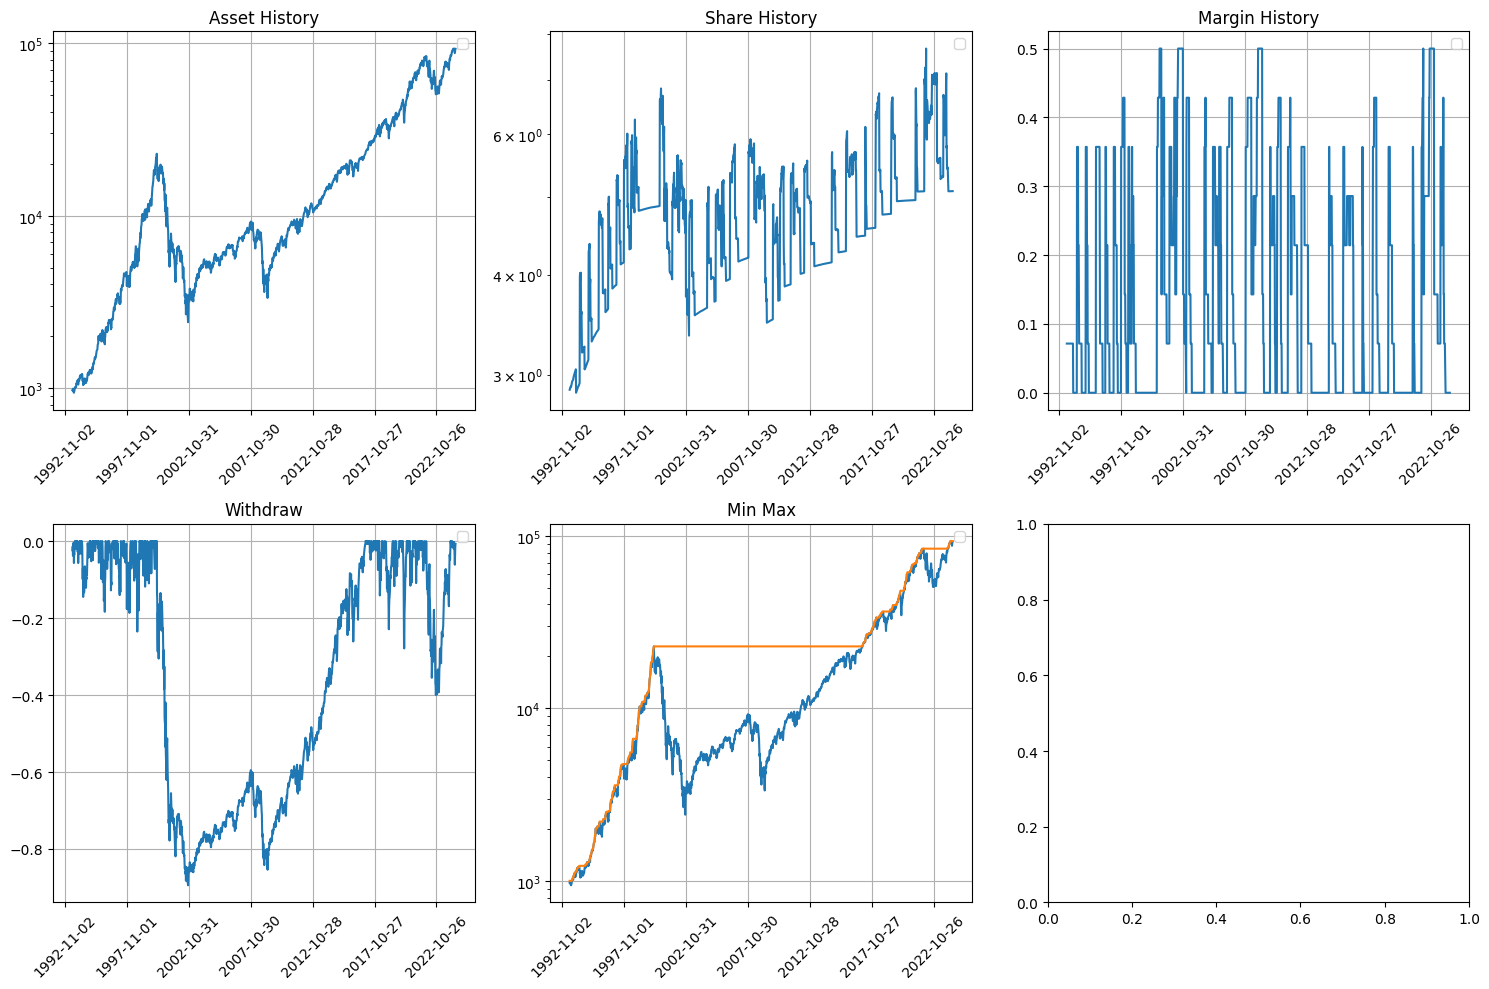

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1560                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 1.5                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                        0.0
share                  4.817776
margin                      0.0
td9                         ddd
asset              87676.816237
min                87676.816237
max                88338.737799
withdraw              -0.007493
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: 28.32574319927665
INFO:__main__:
asset vs. fv: 8.542052186694962
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend(

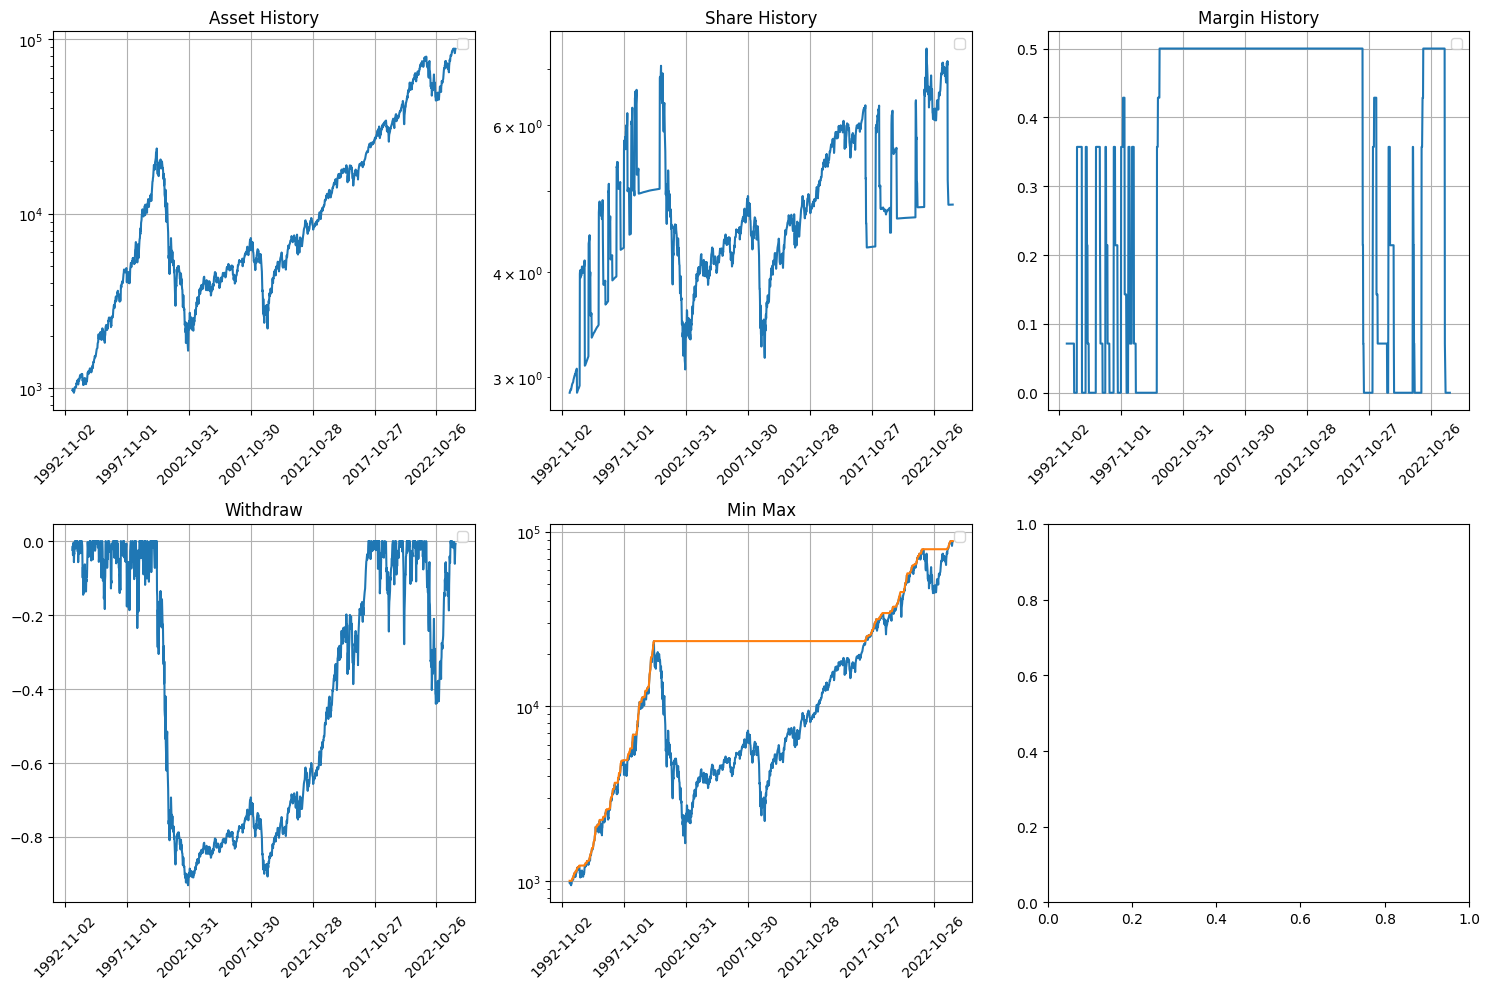

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1560                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 1.5                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

File exists!


INFO:__main__:date                                      2024-05-13 00:00:00
cash                                                      0.0
loan                                                      0.0
share      -2810868311158220903360112139799754192692869110...
margin                                                   -0.0
td9                                                       ddd
asset      -5115389439933441546887476867810741162462322861...
min        -5115389439933441546887476867810741162462322861...
max                                              30692.717613
withdraw   -1666645979167801900879623042363936426185521802...
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: -1.652628526658066e+95
INFO:__main__:
asset vs. fv: -4.9837488889945544e+94
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called 

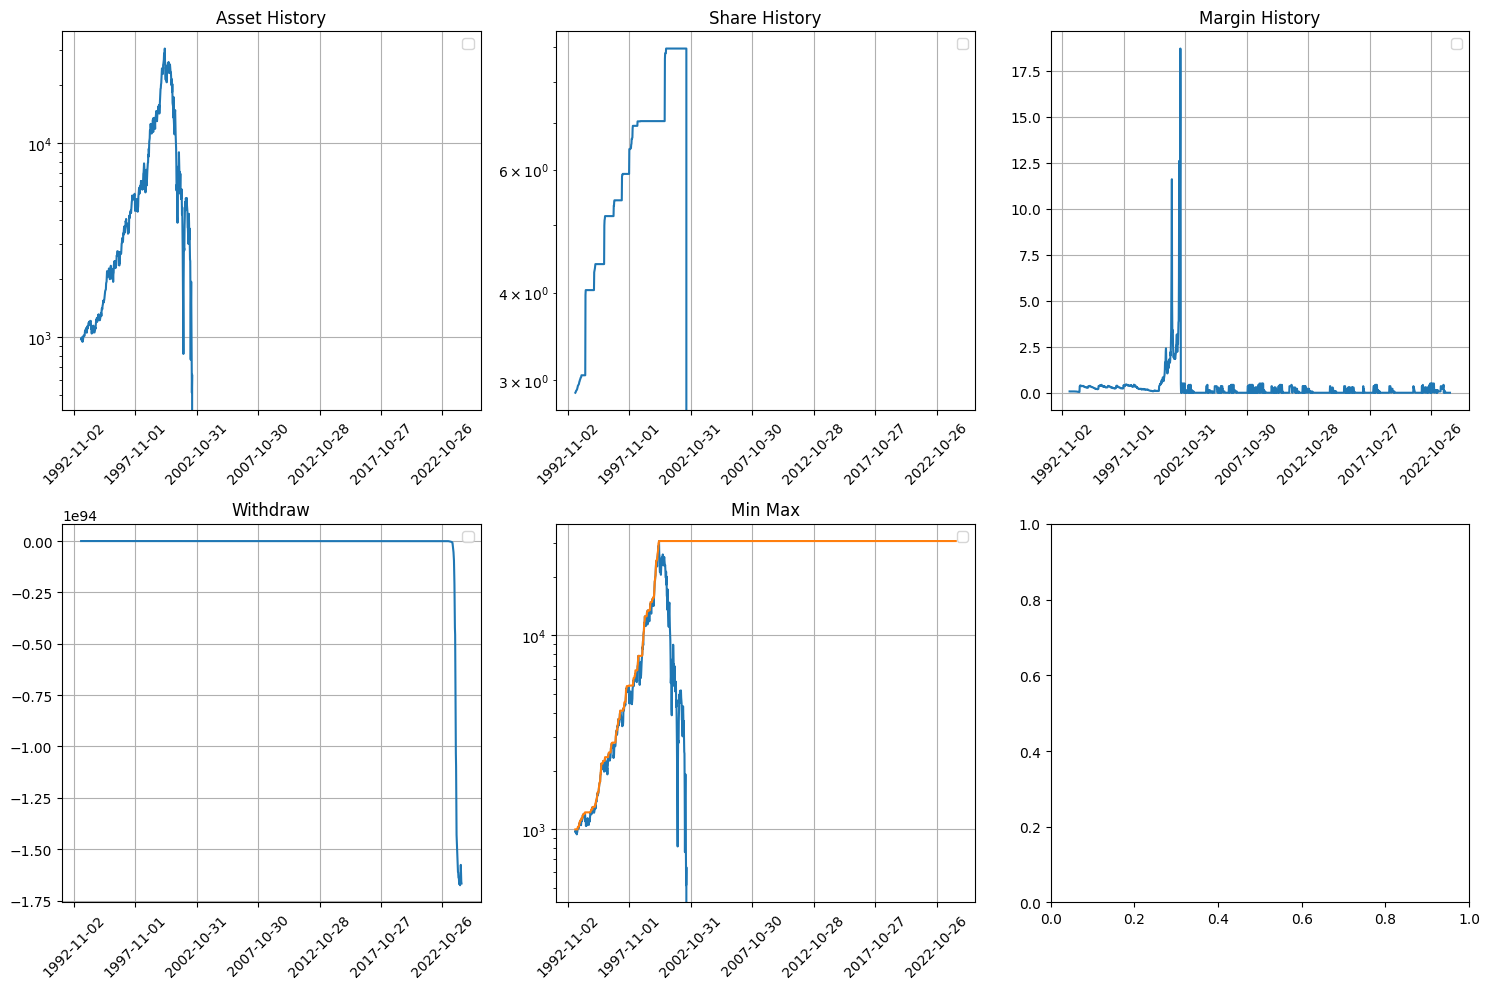

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1560         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 2.0          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                        0.0
share                  4.680062
margin                      0.0
td9                         ddd
asset              85170.614383
min                85170.614383
max                85813.141683
withdraw              -0.007488
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: 27.51606473281754
INFO:__main__:
asset vs. fv: 8.297881515998721
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend(

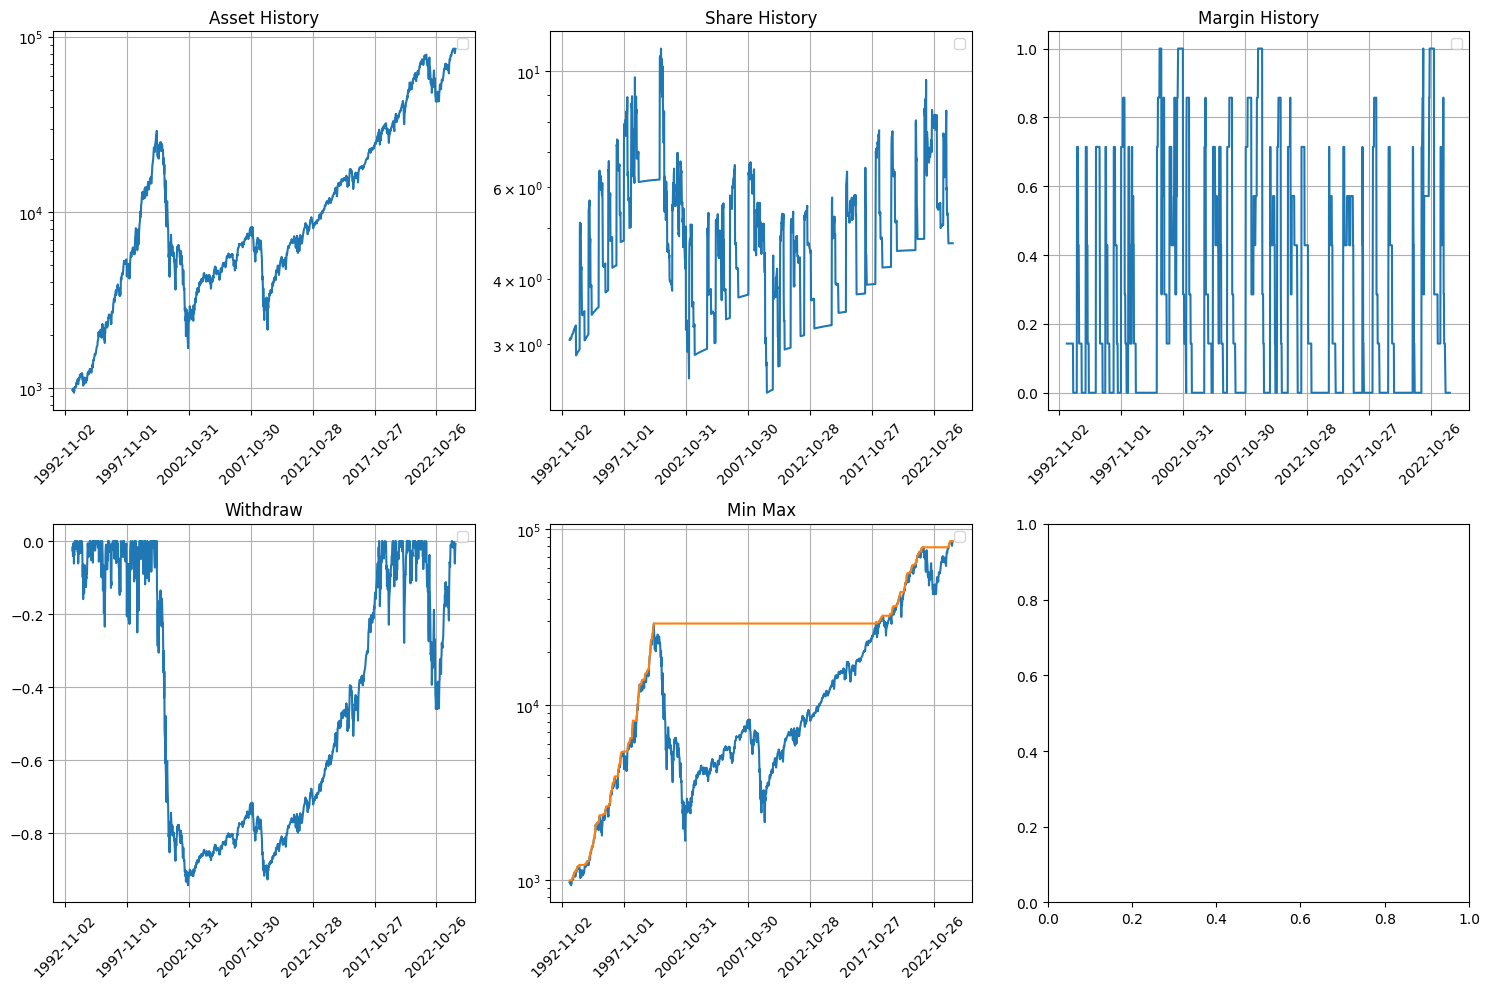

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1560                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 2.0                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                        0.0
share                   4.10992
margin                      0.0
td9                         ddd
asset              74794.826862
min                74794.826862
max                 75357.06105
withdraw              -0.007461
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: 24.16395974741401
INFO:__main__:
asset vs. fv: 7.287004042488035
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend(

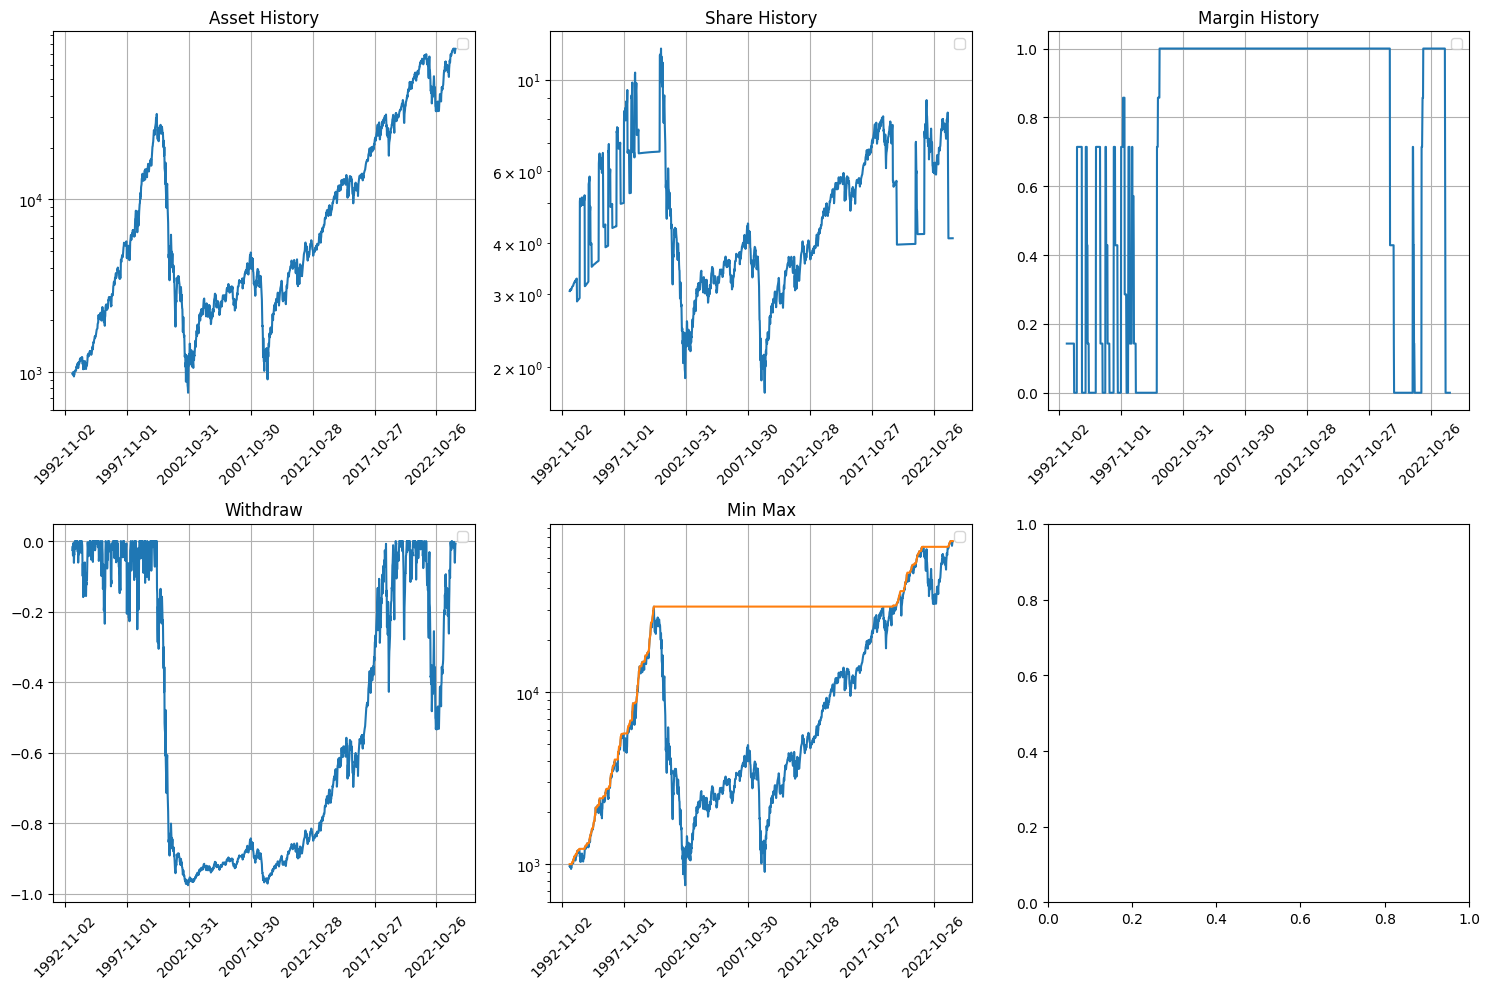

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1560                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 2.0                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

File exists!


INFO:__main__:date                                      2024-05-13 00:00:00
cash                                                      0.0
loan                                                      0.0
share      -4184836374774004665193949000867313060310471944...
margin                                                   -0.0
td9                                                       ddd
asset      -7615820248280321512380334320554168363721256514...
min        -7615820248280321512380334320554168363721256514...
max                                              51322.080912
withdraw   -1483926628267940853701914897722399451765656674...
Name: 1462, dtype: object
INFO:__main__:
asset vs. pv: -2.4604425418628413e+187
INFO:__main__:
asset vs. fv: -7.419833063901218e+186
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is calle

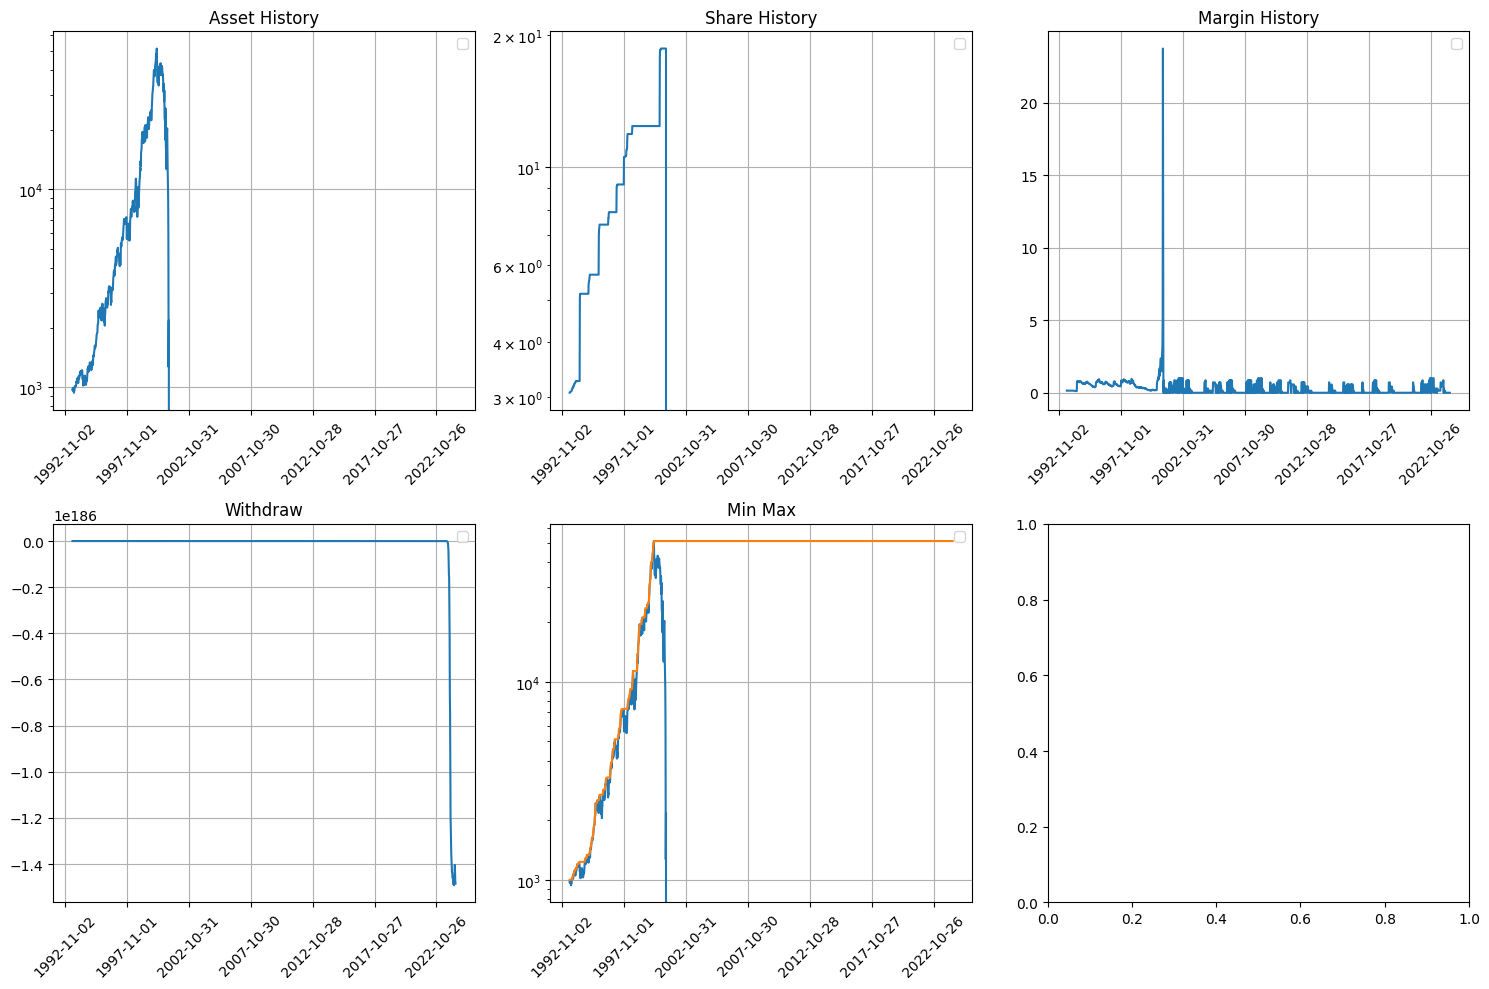

In [42]:
import itertools

# Define the grid search grid
grid = {
    'weeks': [30*52],
    'initial': [1000.],
    'annual_investment': [120.],
    'min_leverage': [1.],
    'max_leverage': [1.5, 2.],
    'max_margin': [10.],
    'annual_risk_free_rate': [ 0.04],
    'risk_adj': [0.0],
    'annual_inflation_rate': [0.0],
    'strategy': ["td9_leverage", "td9_never_loss_leverage", "td9_passive_leverage"],
    'should_plot': [True],
}

# Perform grid search
param_combinations = list(itertools.product(*grid.values()))

# Print the parameter combinations
for params in param_combinations:
    param_dict = dict(zip(grid.keys(), params))
    logger.info(tabulate_printer(param_dict))
    df = loader("^NDX")
    leverage_investment(df, **param_dict)

INFO:__main__:
+-----------------------+--------------+
| Key                   | Value        |
+=======================+==============+
| weeks                 | 1560         |
+-----------------------+--------------+
| initial               | 1000.0       |
+-----------------------+--------------+
| annual_investment     | 120.0        |
+-----------------------+--------------+
| min_leverage          | 1.0          |
+-----------------------+--------------+
| max_leverage          | 1.5          |
+-----------------------+--------------+
| max_margin            | 10.0         |
+-----------------------+--------------+
| annual_risk_free_rate | 0.04         |
+-----------------------+--------------+
| risk_adj              | 0.0          |
+-----------------------+--------------+
| annual_inflation_rate | 0.0          |
+-----------------------+--------------+
| strategy              | td9_leverage |
+-----------------------+--------------+
| should_plot           | True         |
+

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan                73114.44262
share               4664.789717
margin                 0.357143
td9                         ddu
asset             204720.439335
min               204720.439335
max               512498.621493
withdraw              -0.600544
Name: 668, dtype: object
INFO:__main__:
asset vs. pv: 66.13901874110486
INFO:__main__:
asset vs. fv: 19.94521187630273
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend()

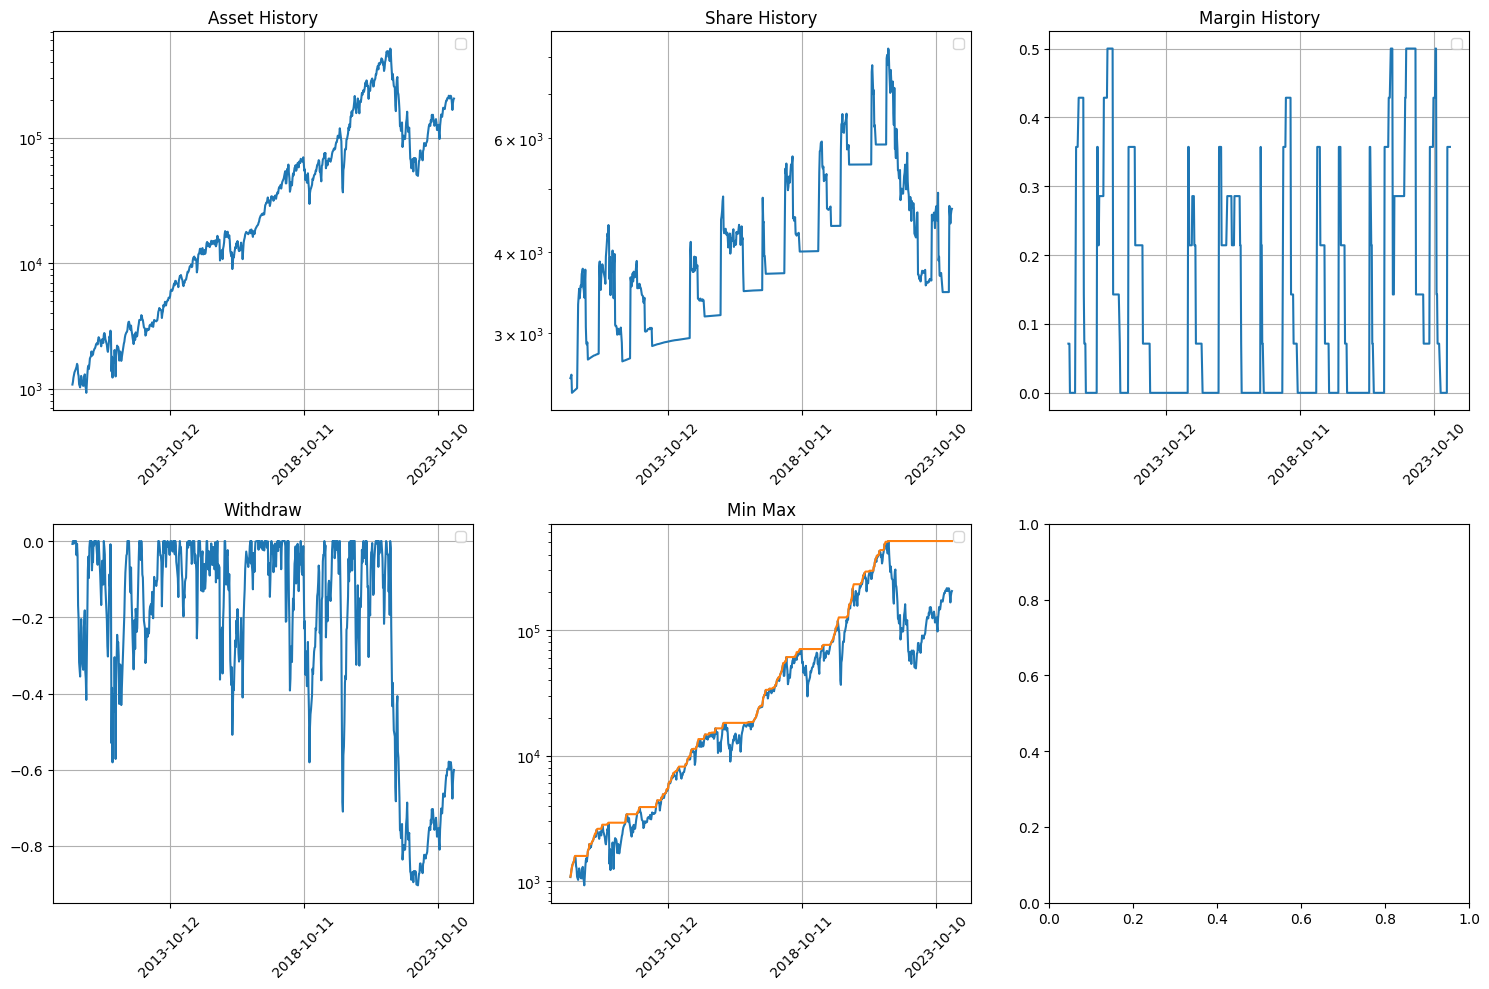

INFO:__main__:
+-----------------------+-------------------------+
| Key                   | Value                   |
+=======================+=========================+
| weeks                 | 1560                    |
+-----------------------+-------------------------+
| initial               | 1000.0                  |
+-----------------------+-------------------------+
| annual_investment     | 120.0                   |
+-----------------------+-------------------------+
| min_leverage          | 1.0                     |
+-----------------------+-------------------------+
| max_leverage          | 1.5                     |
+-----------------------+-------------------------+
| max_margin            | 10.0                    |
+-----------------------+-------------------------+
| annual_risk_free_rate | 0.04                    |
+-----------------------+-------------------------+
| risk_adj              | 0.0                     |
+-----------------------+------------------------

File exists!


INFO:__main__:date        2024-05-13 00:00:00
cash                        0.0
loan              118735.005006
share               5980.607905
margin                      0.5
td9                         ddu
asset             237470.010013
min               237470.010013
max               625127.379296
withdraw              -0.620125
Name: 668, dtype: object
INFO:__main__:
asset vs. pv: 76.71942036501682
INFO:__main__:
asset vs. fv: 23.13589048239685
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][1].legend()

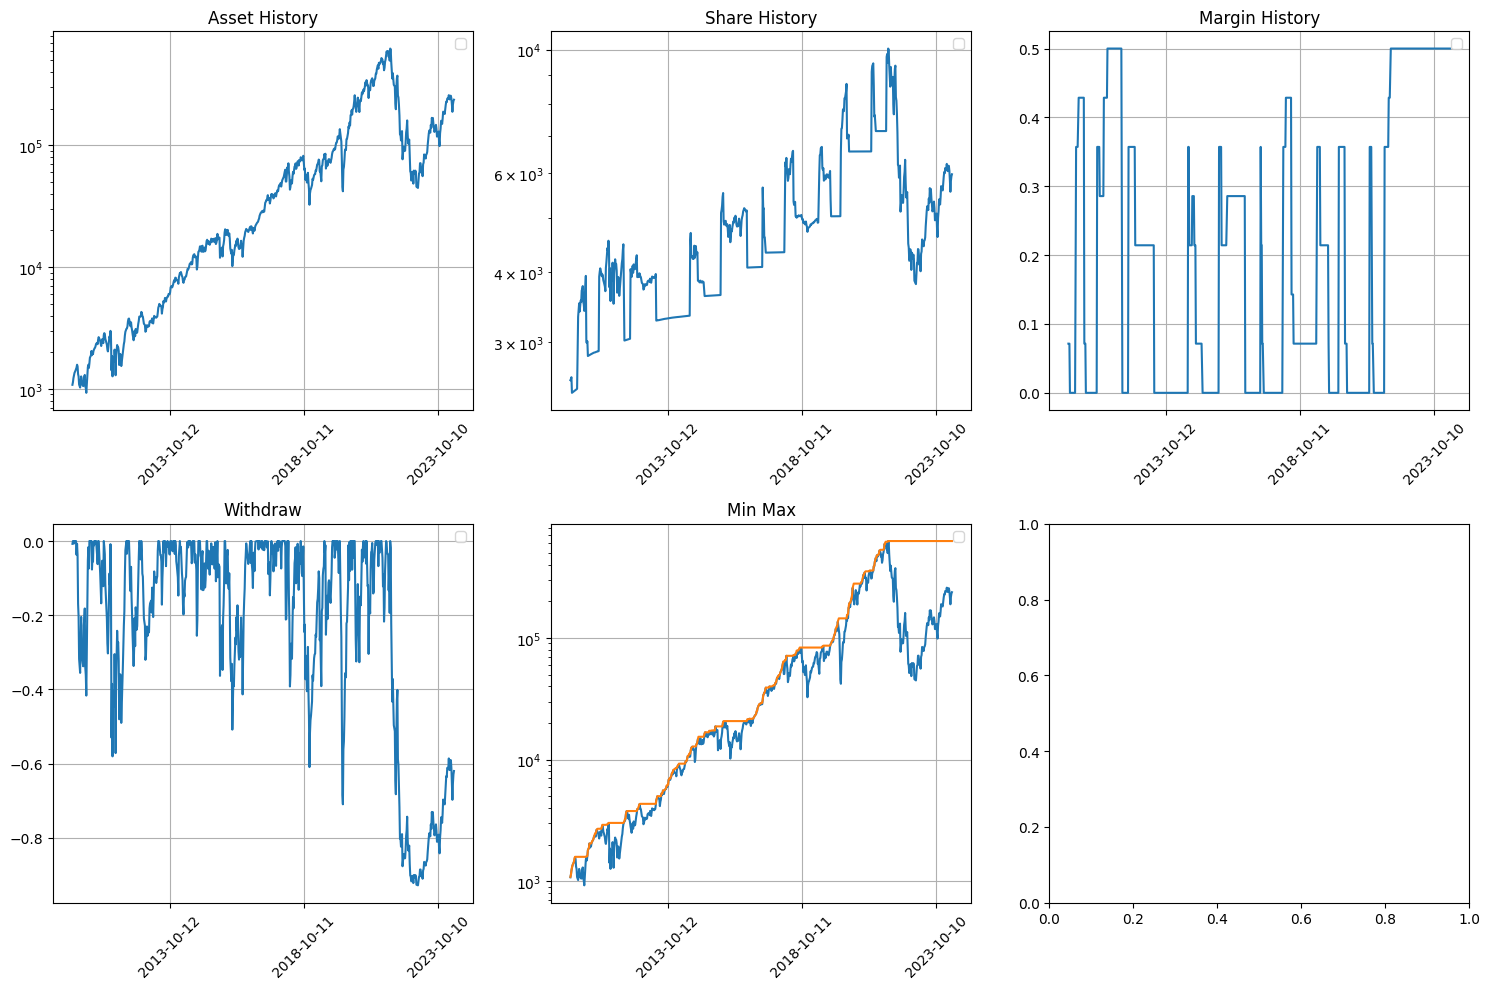

INFO:__main__:
+-----------------------+----------------------+
| Key                   | Value                |
+=======================+======================+
| weeks                 | 1560                 |
+-----------------------+----------------------+
| initial               | 1000.0               |
+-----------------------+----------------------+
| annual_investment     | 120.0                |
+-----------------------+----------------------+
| min_leverage          | 1.0                  |
+-----------------------+----------------------+
| max_leverage          | 1.5                  |
+-----------------------+----------------------+
| max_margin            | 10.0                 |
+-----------------------+----------------------+
| annual_risk_free_rate | 0.04                 |
+-----------------------+----------------------+
| risk_adj              | 0.0                  |
+-----------------------+----------------------+
| annual_inflation_rate | 0.0                  |
+----

File exists!


INFO:__main__:date          2024-05-13 00:00:00
cash                          0.0
loan        -400462712607825792.0
share        -25550004580627036.0
margin                   0.357143
td9                           ddu
asset      -1121295595301912064.0
min        -1121295595301912064.0
max                 965987.025129
withdraw    -1160777076848.833252
Name: 668, dtype: object
INFO:__main__:
asset vs. pv: -362256893511530.8
INFO:__main__:
asset vs. fv: -109243992914703.73
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][0].legend()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_91300/2005013206.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argumen

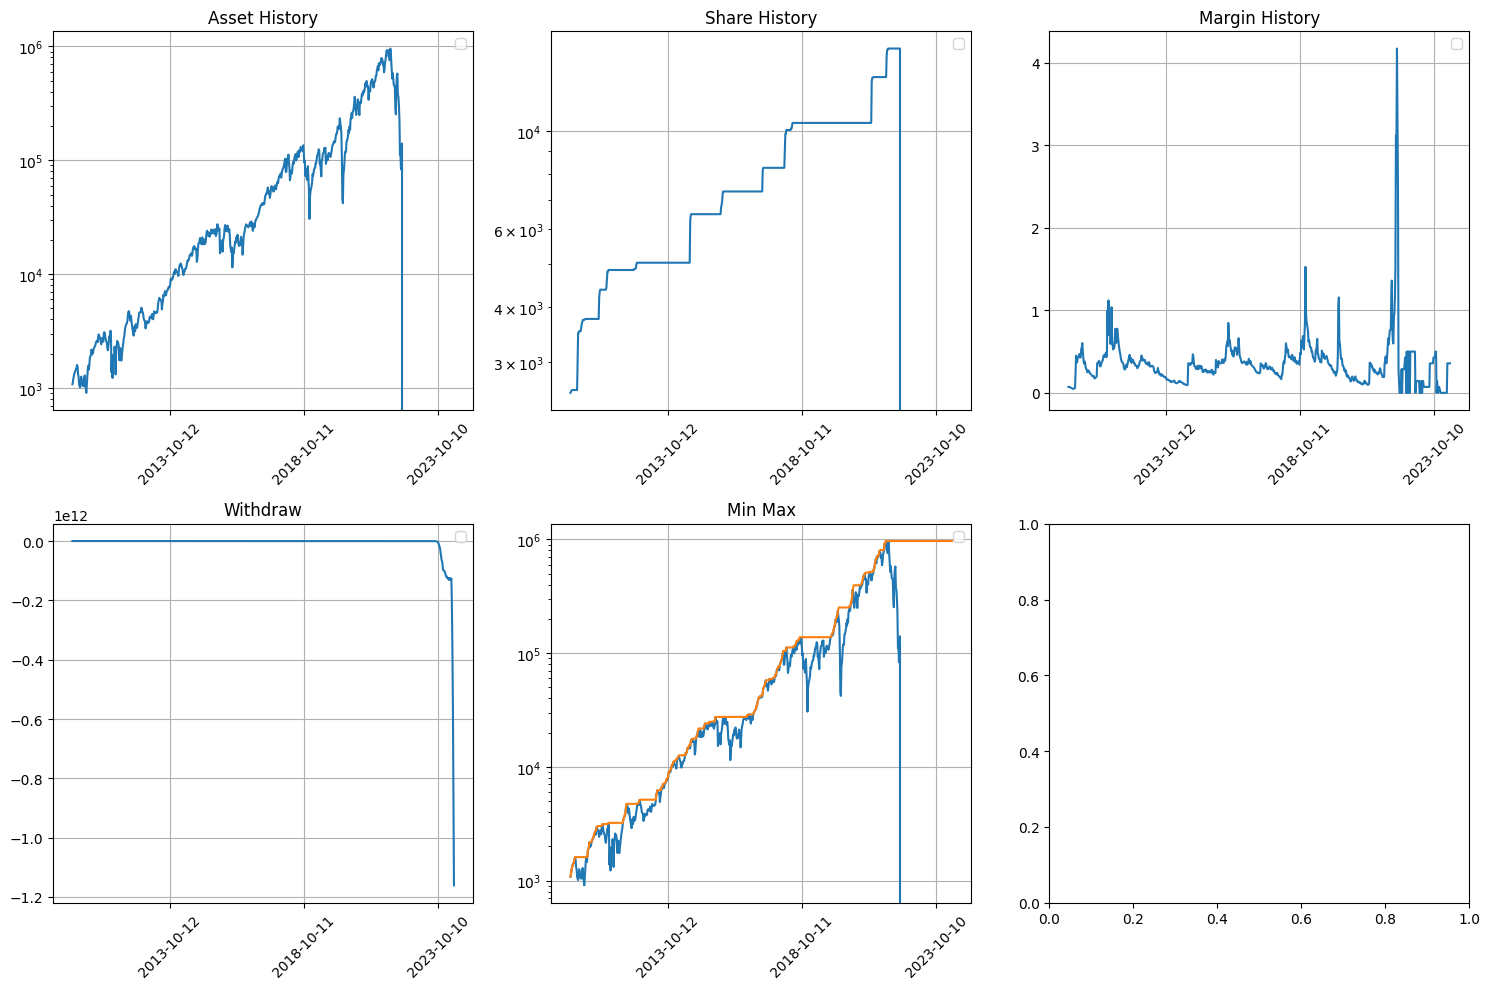

In [43]:
import itertools

# Define the grid search grid
grid = {
    'weeks': [30*52],
    'initial': [1000.],
    'annual_investment': [120.],
    'min_leverage': [1.],
    'max_leverage': [1.5],
    'max_margin': [10.],
    'annual_risk_free_rate': [ 0.04],
    'risk_adj': [0.0],
    'annual_inflation_rate': [0.0],
    'strategy': ["td9_leverage", "td9_never_loss_leverage", "td9_passive_leverage"],
    'should_plot': [True],
}

# Perform grid search
param_combinations = list(itertools.product(*grid.values()))

# Print the parameter combinations
for params in param_combinations:
    param_dict = dict(zip(grid.keys(), params))
    logger.info(tabulate_printer(param_dict))
    df = loader("TQQQ")
    leverage_investment(df, **param_dict)